# ZEVA Data Storytelling Project – Q1-Q3 2025  

**Data Source:**  
All data was collected from the ZEVA backend for **Q1-Q3 2025 (Jan to September)**.  

---

## Objective  
The primary objective of this project is to deliver **Phase 1: Driving-Related Performance Insights**. This phase focuses on:  

- **Daily Total Mileage per Vehicle**  
  Measuring how far each vehicle travels on a daily basis.  

- **Travel Patterns per User**  
  Analyzing trip lengths, travel times, and trip frequency for each user.  

These insights will support **internal decision-making** and can also be leveraged for **external communication and marketing initiatives**.  

---

## Phase 1 – Methodology  

### 1. Data Fetching  
- Conducted using the script `pull_vehicle_data.py`.  
- Extracted raw trip and vehicle telemetry data for the Q3 period.  

### 2. Data Cleaning  
- Established relationships between the **auth** tables and corresponding **client** tables.  
- Correctly mapped vehicles to clients to ensure accuracy.  
- Standardized timestamps, vehicle IDs, and user mappings for consistency across datasets.  

### 3. Data Structuring  
- Built curated datasets for analysis, including:  
  - **Vehicle Distribution:** Distribution of vehicle models on the platform, used for assessing data quality.  
  - **Mileage Dataset:** Daily aggregated mileage per vehicle.  
  - **User Travel Dataset:** Trip patterns per user, including distribution of trip lengths and start/end times.  
  - **Driving Behavior Dataset:** Derived metrics capturing driving styles, such as early-morning vs. late-night driving tendencies.  

These datasets form the foundation for visualization, storytelling, and newsletter-ready insights.  


In [1]:
# --- Core Data Handling ---
import pandas as pd
import numpy as np

# --- Date & Time Handling ---
import datetime as dt
import pytz

# --- Visualization ---
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

# --- Display settings ---
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)

# --- Altair settings ---
alt.data_transformers.disable_max_rows()  # allow larger datasets

# --- Matplotlib style ---
plt.style.use("seaborn-v0_8")


In [2]:
# I have downloaded all the necessary and related data under the `pull_vehicle_data.py`
user_company = pd.read_csv("user_company/user_company.csv", sep = ';')
company_list = pd.read_csv("user_company/company.csv", sep = ';')
user_profile = pd.read_csv("user_company/user_profile.csv", sep = ';')
user_config = pd.read_csv("user_preference/user_config.csv", sep = ';')

In [3]:

# Filter the DataFrame to only includes the user type which shows active under the user_company table
filtered_df = company_list[company_list['status'] == 'ACTIVE']

# Define color scheme
color_scheme = alt.Scale(domain=['FM', 'IN'], range=['#143987', '#FF653E'])

# Create a bar chart using Altair to show the distribution of 'datatype'
base = alt.Chart(filtered_df).encode(
    x=alt.X('data_type', title='User Type'),
    y=alt.Y('count()', title='# of Users')
)

# Create a bar chart
bars = base.mark_bar().encode(
    color=alt.Color('data_type', scale=color_scheme, title='User Type')
)

# Add text labels
text = base.mark_text(
    align='center',
    baseline='middle',
    dy=-10,  # Adjust this value to position the text labels
    font='Avenir',
    fontSize=10
).encode(
    text='count()'
)

# Combine the bar chart and text labels
chart = (bars + text).properties(
    # title=alt.TitleParams(text='Distribution of Fleet Managers and Individual Users (Status Active)', font='Avenir', fontSize=16, anchor='middle', color='black'),
    width=250,
    height=500
)

# Display the chart
chart.show()

# Save the chart as a high-resolution PNG
chart.save('Results/user_type_distribution.png')


alt.LayerChart(...)

In [4]:
user_profile

,id,password,is_superuser,first_name,last_name,is_staff,is_active,date_joined,email,last_login,phone_number,department_id,email_verified,verification_code,verification_code_expiry,config_id,uuid,subscribed_to_emails,accepted_privacy_policy,accepted_terms_and_conditions,sso_provider,birth_year,country,gender,postal_code,is_individual,journey_triggered,accepted_terms_of_service,last_api_called_time,platform,notification_settings_id
0,1651,pbkdf2_sha256$600000$vBgMNFvNAOTYgRFBt1Cxk9$dL...,False,angel,huang,False,True,2024-03-22 22:26:22.768768+00:00,hyyptfj@gmail.com,2024-03-22 22:30:16.184425+00:00,NaN,NaN,True,34803920.0,2024-03-22 22:31:34.733521+00:00,892.0,d2bdcc1f-674f-449a-9120-1705c228d3b1,True,2024-03-22 22:27:25.247640+00:00,2024-03-22 22:27:24.947358+00:00,NaN,1997.0,Canada,Prefer not to say,T9E8E2,True,False,NaN,NaN,NaN,NaN
1,6733,NaN,False,Christopher,Baird,False,True,2024-12-21 19:45:45.652000+00:00,chris@baird.cc,NaN,NaN,NaN,True,NaN,NaN,5941.0,393c6740-6fcb-4daf-b42b-c5fef0ef1000,True,2025-02-21 12:46:51.756295+00:00,2025-02-21 12:46:51.884239+00:00,tesla,1963.0,United States,Male,75681,True,False,2025-02-21 12:46:52.016480+00:00,2025-02-21 12:46:58.229875+00:00,Mobile,2179.0
2,2476,pbkdf2_sha256$600000$y9coUbMJd7rxJQFV0XPUOh$Cx...,False,Justin,Zhao,False,True,2024-06-05 19:57:56.262148+00:00,jacky135is@gmail.com,NaN,NaN,NaN,True,66658833.0,2024-06-05 20:03:07.086220+00:00,1684.0,8b50dba4-6e87-4f34-91f9-2300cfdb798e,True,2024-06-05 19:59:18.653710+00:00,2024-06-05 19:59:18.796706+00:00,NaN,1971.0,United States,Male,95054,True,False,2024-06-05 19:59:18.959837+00:00,NaN,NaN,NaN
3,5182,NaN,False,Céline,Cannevière,False,True,2024-10-25 08:54:51.538616+00:00,canneviere.celine@gmail.com,NaN,NaN,NaN,True,NaN,NaN,4390.0,157a3f64-2690-4de6-b736-f3ccc3ba911e,True,NaN,NaN,tesla,NaN,NaN,NaN,NaN,True,False,NaN,2024-12-03 07:39:01.332020+00:00,Mobile,NaN
4,2468,pbkdf2_sha256$600000$tXaYIUh5sHStyhzN71WFpp$9i...,False,sunxin,he,False,True,2024-06-04 16:37:15.112023+00:00,sunxinruby@gmail.com,NaN,NaN,NaN,True,95507157.0,2024-06-04 16:43:37.055618+00:00,1676.0,549b4610-1a93-47d4-a54e-bbd472b89482,True,2024-06-04 16:40:34.577539+00:00,2024-06-04 16:40:34.749175+00:00,NaN,1987.0,United States,Female,91911,True,False,2024-06-04 16:40:34.955929+00:00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1301,27556,NaN,False,Lloyd,Sims,False,True,2025-09-29 20:48:57.323100+00:00,lloyd.sims@gmail.com,NaN,NaN,NaN,True,NaN,NaN,26764.0,a56bcec6-74bd-484c-8c93-2c687209d234,True,2025-09-29 20:50:39.895547+00:00,2025-09-29 20:50:40.083279+00:00,tesla,NaN,United States,NaN,NaN,True,False,2025-09-29 20:50:40.283652+00:00,2025-10-01 22:00:19.239160+00:00,Mobile,16996.0
1302,27328,NaN,False,Mohammed,Alogaili,False,True,2025-09-24 23:57:08.465891+00:00,mohammed.alogele1998@gmail.com,NaN,NaN,NaN,True,NaN,NaN,26536.0,19aa1a94-d726-4c1e-a67f-730d6ec4fdd6,True,2025-09-24 23:58:20.126632+00:00,2025-09-24 23:58:20.297052+00:00,tesla,NaN,Netherlands,NaN,NaN,True,False,2025-09-24 23:58:20.469704+00:00,2025-09-25 00:00:01.156849+00:00,Mobile,16864.0
1303,27260,NaN,False,NaN,NaN,False,False,2025-09-24 18:01:54.655446+00:00,voided_27260::e_bayoglu@hotmail.com,NaN,NaN,NaN,True,NaN,NaN,NaN,e38469de-f9e2-43ef-abdf-cf34b513b25e,False,NaN,NaN,tesla,NaN,NaN,NaN,NaN,True,False,NaN,NaN,Mobile,NaN
1304,20065,pbkdf2_sha256$600000$3zV5EhzwNqg7h8CzMMZY68$3z...,False,Quinton,Kelly,False,True,2025-08-06 11:38:00.332814+00:00,360.quinton@gmail.com,NaN,NaN,NaN,True,NaN,NaN,19273.0,d65e2639-58e8-4b46-9aac-ed65cdd88586,True,2025-08-06 11:40:53.821368+00:00,2025-08-06 11:40:53.980588+00:00,tesla,NaN,United Kingdom,NaN,NaN,True,False,2025-08-06 11:40:54.157777+00:00,2025-09-27 16:21:48.378481+00:00,Mobile,10858.0


In [5]:
# --- Preprocessing ---
# Replace null values in the 'gender' column with 'Not Recorded'
user_profile['gender'] = user_profile['gender'].fillna('Not Recorded')

# Drop rows where birth_year is null
user_profile_clean = user_profile.dropna(subset=['birth_year']).copy()

# --- Gender Distribution ---
gender_colors = alt.Scale(
    domain=['Not Recorded', 'Female', 'Male', 'Other', 'Prefer not to say'],
    range=['#143987', '#2094FA', '#FF653E', '#00A667', '#FAAE43']
)

gender_base = alt.Chart(user_profile).encode(
    x=alt.X('gender:N', title='Gender', axis=alt.Axis(labelFont='Avenir', titleFont='Avenir')),
    y=alt.Y('count()', title='# of Users', axis=alt.Axis(labelFont='Avenir', titleFont='Avenir'))
)

gender_bars = gender_base.mark_bar().encode(
    color=alt.Color('gender:N', scale=gender_colors, title='Gender')
)

gender_text = gender_base.mark_text(
    align='center',
    baseline='middle',
    dy=-10,
    font='Avenir',
    fontSize=10
).encode(
    text='count()'
)

gender_chart = (gender_bars + gender_text).properties(
    title=alt.TitleParams(
        text='Gender Distribution',
        font='Avenir', fontSize=16,
        anchor='middle', color='black'
    ),
    height=400
)

# --- Birth Year Distribution ---
birth_year_base = alt.Chart(user_profile_clean).encode(
    x=alt.X('birth_year:O', title='Birth Year', axis=alt.Axis(labelFont='Avenir', titleFont='Avenir')),
    y=alt.Y('count()', title='# of Users', axis=alt.Axis(labelFont='Avenir', titleFont='Avenir'))
)

birth_year_bars = birth_year_base.mark_bar().encode(
    color=alt.Color('birth_year:N', title='Birth Year')
)

birth_year_text = birth_year_base.mark_text(
    align='center',
    baseline='middle',
    dy=-10,
    font='Avenir',
    fontSize=10
).encode(
    text='count()'
)

birth_year_chart = (birth_year_bars + birth_year_text).properties(
    title=alt.TitleParams(
        text='Birth Year Distribution',
        font='Avenir', fontSize=16,
        anchor='middle', color='black'
    ),
    width=600, height=400
)

# --- Combine Charts ---
combined_chart = alt.hconcat(
    gender_chart,
    birth_year_chart
).resolve_scale(
    color='independent'
)

# Display
combined_chart.show()

# Save the combined chart as a high-resolution PNG
combined_chart.save('Results/userprofile_distribution.png', scale_factor=3.0)


alt.HConcatChart(...)

In [6]:
# Create a new column 'country' based on the 'company_type'
user_company['country'] = user_company.apply(
    lambda row: row['company_country'] if row['company_type'] == 'FM' else row['user_country'],
    axis=1
)

# Get the country distribution from the company_type
fleet_manager = user_company[user_company['company_type'] == 'FM']

# Get the first occurrence of each company_db to determine the country for each company
company_region = fleet_manager.drop_duplicates('company_db')[['company_db', 'country']]

# Merge the region information back into the fleet_manager DataFrame
fleet_manager = fleet_manager.merge(company_region, on='company_db', suffixes=('', '_region'))

In [7]:
import pandas as pd
import altair as alt

# Create a custom color scale
color_scale = alt.Scale(
    domain=['Australia', 'Canada', 'Netherlands', 'Not Recorded'],
    range=['#143987', '#FF653E', '#2094FA', '#00A667']
)

excluded_internal_companies = ['zerocar', 'jason', 'fleettest1', 'fleettest2', 'antithefttesting', 'fleettesting00', 'antithefttesting2', 'antithefttesting3']

fleet_manager['country'] = fleet_manager['country'].fillna('Not Recorded')
# Get rid of all the fleet that belongs to us internally
non_internal_fleet_manager = fleet_manager[~fleet_manager['company_db'].isin(excluded_internal_companies)].copy()


# Create the bar chart for the distribution of fleet managers by country
country_base = alt.Chart(non_internal_fleet_manager).encode(
    x=alt.X('country', title='Country', axis=alt.Axis(labelFont='Avenir', titleFont='Avenir')),
    y=alt.Y('count()', title='# of Users', axis=alt.Axis(labelFont='Avenir', titleFont='Avenir'))
)

country_bars = country_base.mark_bar().encode(
    color=alt.Color('country', scale=color_scale)
)

country_text = country_base.mark_text(
    align='center',
    baseline='middle',
    dy=-10,
    font='Avenir',
    fontSize=10
).encode(
    text='count()'
)

country_chart = (country_bars + country_text).properties(
    title=alt.TitleParams(text='Distribution of Users in Fleet Managers by Country', font='Avenir', fontSize=16, anchor='middle', color='black'),
    width=250,
    height=500
)

# Display the chart
country_chart.show()
country_chart.save('Results/fleet_manager_country.png', scale_factor=3.0)


alt.LayerChart(...)

In [8]:
import pandas as pd
import altair as alt

# -------------------------------------------------------------------
# Data Preparation
# -------------------------------------------------------------------
# Filter data for individual users
user_country_distribution = user_company[user_company['company_type'] == 'IN'].copy()

# Clean up the country column
user_country_distribution['user_country'] = (
    user_country_distribution['user_country']
    .fillna('Not Recorded')                           # replace NaN
    .astype(str)                                      # ensure string
    .str.strip()                                      # strip whitespace
    .replace(r'^\s*$', 'Not Recorded', regex=True)    # replace empty/whitespace-only strings
    .str.title()                                      # normalize casing
)


# Keep only valid countries
non_empty_country_distribution = user_country_distribution[
    user_country_distribution['user_country'] != 'Not Recorded'
]

# -------------------------------------------------------------------
# Visualization
# -------------------------------------------------------------------
base = alt.Chart(non_empty_country_distribution).encode(
    x=alt.X('user_country:N',
            title='Country',
            axis=alt.Axis(labelFont='Avenir', titleFont='Avenir')),
    y=alt.Y('count()',
            title='# of Users',
            axis=alt.Axis(labelFont='Avenir', titleFont='Avenir')),
    color=alt.Color('user_country:N',
                    legend=alt.Legend(title="User Country",
                                      labelFont='Avenir',
                                      titleFont='Avenir'))
)

bars = base.mark_bar()

text = base.mark_text(
    align='center',
    baseline='middle',
    dy=-10,
    font='Avenir',
    fontSize=10
).encode(text='count()')

chart = (bars + text).properties(
    title=alt.TitleParams(
        text='Distribution of Individual Users by Country',
        font='Avenir', fontSize=16,
        anchor='middle', color='black'
    ),
    width=500,
    height=500
)

# Display and Save
chart.show()
chart.save('Results/individual_user_country.png', scale_factor=3.0)


alt.LayerChart(...)

In [9]:
# The next section is regarding the distribution of the vehicle
# I would need the name, country, company_db
# Above is the information for the company name, country, company name
userconfig_full = pd.merge(user_profile, user_config, left_on='config_id', right_on='id', suffixes=('_user', '_userconfig'))
merged_fleet = pd.merge(fleet_manager, company_list, left_on='company_id', right_on='id', suffixes=('_fleet_manager', '_company'))
fleet_db = merged_fleet.drop_duplicates('company_db_fleet_manager')[['company_db_fleet_manager', 'country_region', 'company_name', 'data_type', 'userprofile_id']]
fleet_db_timezone = pd.merge(fleet_db, userconfig_full, left_on='userprofile_id', right_on='id_user', suffixes=('_fleet', '_company'))[['company_db_fleet_manager', 'country_region', 'company_name', 'data_type', 'timezone']]

# I would need the setting between the user and the user configuration
user_country_distribution['name'] = user_country_distribution['user_firstname'] + ' ' + user_country_distribution['user_lastname']
user_db = user_country_distribution[['name', 'user_country', 'company_db', 'company_type', 'userprofile_id', 'company_id']]
user_db_timezone = pd.merge(user_db, userconfig_full, left_on='userprofile_id', right_on='id_user', suffixes=('_user', '_company'))[['name', 'user_country', 'company_db', 'company_type', 'userprofile_id', 'company_id', 'timezone']]

# Okay, I am performing the data analysis regarding the vehicle distribution of individual db

In [10]:
# The structure has changed since all the individual data has been centralized in the individual db
individual_vehicle = pd.read_csv("vehicles/individuals.csv", sep = ';')
individual_trips = pd.read_csv("vehicle_trip_data/individuals.csv", sep = ';')
individual_dailyanalytics = pd.read_csv("vehicle_vehicleanalytics/individuals.csv", sep = ';')

/var/folders/b3/p4mdfk8d4hv6pkzf469hhkc40000gn/T/ipykernel_86075/2008398432.py:3: DtypeWarning: Columns (7,9,12) have mixed types. Specify dtype option on import or set low_memory=False.
  individual_trips = pd.read_csv("vehicle_trip_data/individuals.csv", sep = ';')


In [11]:
individual_trips[~individual_trips["end_timestamp"].notnull()]

,id,start_timestamp,end_timestamp,starting_odometer,end_odometer,starting_battery_level,end_battery_level,starting_idle_timestamp,vehicle_id,end_address,starting_address,id.1,v_id,vin,license_plate,display_name,model,color,description,low_battery_alert_threshold,overcharge_alert_threshold,speed_alert_threshold,brand_id,token_id,user_color,premium,state,nickname,update_scheduled_for,firmware_version,model_year,company_id,anti_theft_pin,anti_theft_state,is_untracked
134,135,2025-02-19 23:37:54.750670+00:00,NaN,54230.188913,NaN,9,NaN,NaN,1,NaN,"201 Sage St, Davis, CA 95616-8179, United States",1,3744521553983449,5YJ3E1EA6NF326030,NaN,Midnight,Model 3,NaN,NaN,0.0,NaN,0,1,1,white,True,archived,NaN,NaN,NaN,2022.0,6898,NaN,off,False
135,136,2025-02-20 00:12:03.750669+00:00,NaN,54234.642902,NaN,73,NaN,NaN,1,NaN,"Tesla, 2151 Cowell Blvd, Davis, CA 95618-6391,...",1,3744521553983449,5YJ3E1EA6NF326030,NaN,Midnight,Model 3,NaN,NaN,0.0,NaN,0,1,1,white,True,archived,NaN,NaN,NaN,2022.0,6898,NaN,off,False
136,137,2025-02-20 01:03:46.750932+00:00,NaN,54271.455418,NaN,56,NaN,NaN,1,NaN,"1640 E Roseville Pkwy, Roseville, CA 95661-390...",1,3744521553983449,5YJ3E1EA6NF326030,NaN,Midnight,Model 3,NaN,NaN,0.0,NaN,0,1,1,white,True,archived,NaN,NaN,NaN,2022.0,6898,NaN,off,False
137,138,2025-02-20 02:50:45.634847+00:00,NaN,54308.275391,NaN,36,NaN,NaN,1,NaN,"8270 Delta Shores Cir S, Sacramento, CA 95832-...",1,3744521553983449,5YJ3E1EA6NF326030,NaN,Midnight,Model 3,NaN,NaN,0.0,NaN,0,1,1,white,True,archived,NaN,NaN,NaN,2022.0,6898,NaN,off,False
138,139,2025-02-20 03:09:28.724852+00:00,NaN,54314.566775,NaN,33,NaN,NaN,1,NaN,"6740 Trudy Way, Sacramento, CA 95831-2327, Uni...",1,3744521553983449,5YJ3E1EA6NF326030,NaN,Midnight,Model 3,NaN,NaN,0.0,NaN,0,1,1,white,True,archived,NaN,NaN,NaN,2022.0,6898,NaN,off,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41642,125706,2025-03-31 19:11:19.221218+00:00,NaN,9222.529618,NaN,83,NaN,NaN,269,NaN,"307 NW 2nd St, Mt Enterprise, TX 75681-7439, U...",269,3744586282833659,7SAYGDEE5RA303266,NaN,Taranis,Model Y,NaN,NaN,0.0,NaN,0,1,378,white,True,active,NaN,NaN,NaN,NaN,5842,NaN,off,False
41647,125711,2025-03-31 19:12:19.221283+00:00,NaN,9222.529618,NaN,83,NaN,NaN,269,NaN,"307 NW 2nd St, Mt Enterprise, TX 75681-7439, U...",269,3744586282833659,7SAYGDEE5RA303266,NaN,Taranis,Model Y,NaN,NaN,0.0,NaN,0,1,378,white,True,active,NaN,NaN,NaN,NaN,5842,NaN,off,False
47437,196288,2025-07-10 13:32:14.363712+00:00,NaN,6431.428888,NaN,42,NaN,NaN,924,NaN,"103 Mara Lago St, Greensburg, PA 15601, United...",924,3744239975502605,7SAYGDEE4TF322322,NaN,Launch Model Y,Model Y,NaN,NaN,0.0,NaN,0,1,538,grey,True,active,NaN,NaN,NaN,NaN,13004,NaN,off,False
47443,196308,2025-07-10 14:02:30.542401+00:00,NaN,53846.780499,NaN,74,NaN,NaN,2482,NaN,"1128 S Rancho Dr, Las Vegas, NV 89102-2219, Un...",2482,1493104144709574,5YJYGDED0MF111012,NaN,Silva,Model Y,NaN,NaN,0.0,NaN,0,1,2761,black,True,active,NaN,NaN,NaN,NaN,15260,NaN,off,False


In [12]:
# Check number of unique VINs
unique_vins = individual_vehicle['vin'].nunique()
total_vins = individual_vehicle['vin'].shape[0]

print(f"Total VIN rows: {total_vins}")
print(f"Unique VINs   : {unique_vins}")
print(f"Duplicated VINs (by count): {total_vins - unique_vins}")

# Find VINs that appear more than once
duplicated_vins = individual_vehicle['vin'].value_counts()
repeated_vins = duplicated_vins[duplicated_vins > 1]
print(len(repeated_vins))

print(f"\nNumber of VINs that are repeated: {repeated_vins.shape[0]}")
print("Top 10 repeated VINs:\n")
print(repeated_vins)

# Optional: See the full data rows for duplicated VINs
# repeated_df = individual_vehicle[individual_vehicle['vin'].isin(repeated_vins.index)]

Total VIN rows: 683
Unique VINs   : 659
Duplicated VINs (by count): 24
7

Number of VINs that are repeated: 7
Top 10 repeated VINs:

vin
7SAYGDEE1TF323475    12
7SAXCBE64NF343632     8
5YJSA1E46LF404904     3
5YJ3E1EB0PF714754     2
7SAYGDEE0PA191117     2
7SAYGAEE8PF907960     2
LRWYGDEE2PC066551     2
Name: count, dtype: int64


After searching the database, the first VIN 7SAYGDEE1TF323475 is Ray's vehicle which duplicated for 12 times.
The second one is one model X 7SAXCBE64NF343632 this duplicated for 8 times. Probably the rejoin users.

In [13]:
import re
# I would like to plot the distribution of those vehicle type in total. 
# Therefore, I would need the VIN to vehicle type converter
# Extract valid 17-character VIN using regex
individual_vehicle['cleaned_vin'] = individual_vehicle['vin'].apply(
    lambda x: re.search(r'[A-HJ-NPR-Z0-9]{17}', str(x)).group(0) if re.search(r'[A-HJ-NPR-Z0-9]{17}', str(x)) else None
)

# Updated VIN 4th-digit mapping
vin_model_map = {
    'S': 'Model S',
    'X': 'Model X',
    '3': 'Model 3',
    'Y': 'Model Y',
    'R': 'Roadster',
    'C': 'Cybertruck',
    'T': 'Tesla Semi'
}

# VIN year mapping (2010–2025)
vin_year_map = {
    'A': 2010, 'B': 2011, 'C': 2012, 'D': 2013, 'E': 2014,
    'F': 2015, 'G': 2016, 'H': 2017, 'J': 2018, 'K': 2019,
    'L': 2020, 'M': 2021, 'N': 2022, 'P': 2023, 'R': 2024,
    'S': 2025, 'T': 2026
}



# Extract 4th character and map to body type
def extract_body_type(vin):
    if isinstance(vin, str) and len(vin) >= 4:
        return vin_model_map.get(vin[3].upper(), 'Unknown')
    return 'Invalid'

# Extract 10th character and map to year
def extract_model_year(vin):
    if isinstance(vin, str) and len(vin) >= 10:
        return vin_year_map.get(vin[9].upper(), 'Unknown')
    return 'Invalid'


# Apply it to the cleaned VIN column
individual_vehicle['body_type'] = individual_vehicle['cleaned_vin'].apply(extract_body_type)
individual_vehicle['yob'] = individual_vehicle['cleaned_vin'].apply(extract_model_year)
individual_vehicle

,id,v_id,vin,license_plate,display_name,model,color,description,low_battery_alert_threshold,overcharge_alert_threshold,speed_alert_threshold,brand_id,token_id,user_color,premium,state,nickname,update_scheduled_for,firmware_version,model_year,company_id,anti_theft_pin,anti_theft_state,is_untracked,cleaned_vin,body_type,yob
0,1,3744521553983449,5YJ3E1EA6NF326030,NaN,Midnight,Model 3,NaN,NaN,0.0,NaN,0,1,1,white,True,archived,NaN,NaN,NaN,2022.0,6898,NaN,off,False,5YJ3E1EA6NF326030,Model 3,2022
1,2,1492931409634070,5YJSA1E46LF404904,NaN,RR'S Model S,Model S,NaN,NaN,0.0,NaN,0,1,2,white,False,active,NaN,NaN,NaN,2020.0,1916,NaN,off,False,5YJSA1E46LF404904,Model S,2020
2,3,3744499940292006,7SAXCBE64NF343632,NaN,Model X,Model X,NaN,NaN,0.0,NaN,0,1,2,white,True,active,NaN,NaN,NaN,2022.0,1916,NaN,off,False,7SAXCBE64NF343632,Model X,2022
3,4,3744494460977013,7SAYGAEE7NF426210,NaN,Pat the Pirate,Model Y,NaN,NaN,0.0,NaN,0,1,3,white,True,active,NaN,NaN,2025.14.6,2022.0,11518,NaN,off,False,7SAYGAEE7NF426210,Model Y,2022
4,5,1492661701741631,5YJ3E1EB8NF129191,NaN,Blizzard,Model 3,NaN,NaN,0.0,NaN,0,1,4,white,True,active,NaN,NaN,NaN,NaN,10661,NaN,off,False,5YJ3E1EB8NF129191,Model 3,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
678,11715,1493087604302559,5YJ3E7EB3MF824065,NaN,Mayte,Model 3,NaN,NaN,0.0,NaN,0,1,14166,white,True,active,NaN,NaN,NaN,NaN,26698,NaN,off,False,5YJ3E7EB3MF824065,Model 3,2021
679,11748,1492934466734322,5YJYGDEE3LF037883,NaN,PZW,Model Y,NaN,NaN,0.0,NaN,0,1,14133,white,True,active,NaN,NaN,NaN,NaN,26665,NaN,off,False,5YJYGDEE3LF037883,Model Y,2020
680,11781,1493060721622647,5YJ3E1ECXNF107122,NaN,DRACO,Model 3,NaN,NaN,0.0,NaN,0,1,13836,white,True,active,NaN,NaN,NaN,NaN,26368,NaN,off,False,5YJ3E1ECXNF107122,Model 3,2022
681,11814,1492930766365368,5YJ3E7EB7LF609710,NaN,G499ZB,Model 3,NaN,NaN,0.0,NaN,0,1,14199,white,True,active,NaN,NaN,NaN,NaN,26731,NaN,off,False,5YJ3E7EB7LF609710,Model 3,2020


In [14]:
import altair as alt

body_type_counts_df = individual_vehicle['body_type'].value_counts().reset_index()
body_type_counts_df.columns = ['body_type', 'vehicle_count']

car_colors = alt.Scale(
    domain=['Cybertruck', 'Model 3', 'Model Y', 'Model S', 'Model X'],
    range=['#143987', '#2094FA', '#FF653E', '#00A667', '#FAAE43']
)

# Base bar chart with colors
bars = alt.Chart(body_type_counts_df).mark_bar().encode(
    x=alt.X('body_type:N', title='Body Type'),
    y=alt.Y('vehicle_count:Q', title='Number of Vehicles'),
    color=alt.Color('body_type:N', scale=car_colors, legend=None),  # apply custom colors
    tooltip=['body_type', 'vehicle_count']
)

# Add text labels on top of bars
text = alt.Chart(body_type_counts_df).mark_text(
    align='center',
    baseline='bottom',
    dy=-5,  # shift text above the bar
    fontSize=12
).encode(
    x='body_type:N',
    y='vehicle_count:Q',
    text='vehicle_count:Q'
)

# Combine chart
chart_count = (bars + text).properties(
    title='Number of Vehicles per Body Type',
    width=750,
    height=500
)

chart_count.show()


alt.LayerChart(...)

In [15]:
import altair as alt

body_year_counts = (
    individual_vehicle
    .groupby(['body_type', 'yob'])
    .size()
    .reset_index(name='vehicle_count')
)

# rename once (safe if you re-run the cell)
if 'yob' in body_year_counts.columns:
    body_year_counts = body_year_counts.rename(columns={'yob': 'Model Year'})

base = alt.Chart(body_year_counts).properties(width=150, height=300)

# Bars
bars = base.mark_bar().encode(
    x=alt.X('Model Year:O', title='Model Year', sort='ascending'),
    y=alt.Y('vehicle_count:Q', title='Number of Vehicles'),
    color=alt.Color('Model Year:O', scale=alt.Scale(scheme='viridis'),
                    legend=alt.Legend(title='Model Year')),
    tooltip=[
        alt.Tooltip('body_type:N', title='Body Type'),
        alt.Tooltip('Model Year:O', title='Model Year'),
        alt.Tooltip('vehicle_count:Q', title='Number of Vehicles', format='.0f')
    ]
)

# Value labels on bars
text = base.mark_text(align='center', baseline='bottom', dy=-5, fontSize=12).encode(
    x=alt.X('Model Year:O', sort='ascending'),
    y='vehicle_count:Q',
    text=alt.Text('vehicle_count:Q', format='.0f')
)

# Facet by body type, showing model name as the panel label (no "body_type" header)
chart = (bars + text).facet(
    column=alt.Column(
        'body_type:N',
        header=alt.Header(title=None, labelFontSize=14, labelFontWeight='bold')
    ),
    title='Number of Vehicles by Model Year'
)

chart.show()


alt.FacetChart(...)

In [16]:
# Get all unique vehicle_ids and company_ids that have trips after 2025
all_vehicle_id_2025 = individual_trips['vehicle_id'].unique()
all_company_id_2025 = individual_trips['company_id'].unique()

print("We have " + str(len(all_vehicle_id_2025)) + " cars that provide at least one data point in year 2025")
print("We have " + str(len(all_company_id_2025)) + " users that provide at least one data point in year 2025")


We have 245 cars that provide at least one data point in year 2025
We have 241 users that provide at least one data point in year 2025


In [17]:
# I would like to know all the vehicle that provide at least one trip after year 2025
ind_vehicle_2025 = individual_vehicle[individual_vehicle['id'].isin(all_vehicle_id_2025)]

body_type_counts_df = ind_vehicle_2025['body_type'].value_counts().reset_index()
body_type_counts_df.columns = ['body_type', 'vehicle_count']

car_colors = alt.Scale(
    domain=['Cybertruck', 'Model 3', 'Model Y', 'Model S', 'Model X'],
    range=['#143987', '#2094FA', '#FF653E', '#00A667', '#FAAE43']
)

# Base bar chart with colors
bars = alt.Chart(body_type_counts_df).mark_bar().encode(
    x=alt.X('body_type:N', title='Body Type'),
    y=alt.Y('vehicle_count:Q', title='Number of Vehicles'),
    color=alt.Color('body_type:N', scale=car_colors, legend=None),  # apply custom colors
    tooltip=['body_type', 'vehicle_count']
)

# Add text labels on top of bars
text = alt.Chart(body_type_counts_df).mark_text(
    align='center',
    baseline='bottom',
    dy=-5,  # shift text above the bar
    fontSize=12
).encode(
    x='body_type:N',
    y='vehicle_count:Q',
    text='vehicle_count:Q'
)

# Combine chart
chart_count = (bars + text).properties(
    title='Number of Vehicles per Body Type',
    width=750,
    height=500
)

chart_count.show()


alt.LayerChart(...)

In [18]:
users_2025 = user_db_timezone[user_db_timezone['company_id'].isin(all_company_id_2025)]
users_2025

,name,user_country,company_db,company_type,userprofile_id,company_id,timezone
4,jun hu,United States,individuals,IN,2246,1486,PST8PDT
6,Shuangqiang Li,United States,individuals,IN,2773,2014,CST6CDT
16,Christopher Baird,United States,individuals,IN,6733,5842,CST6CDT
29,Pat Estrada,United States,individuals,IN,8878,7888,EST5EDT
42,Kyle Conner,United States,individuals,IN,8944,7954,MST7MDT
...,...,...,...,...,...,...,...
1037,Randollf Winston,Australia,individuals,IN,26797,25774,UTC
1041,George H,United States,individuals,IN,26865,25842,EST5EDT
1042,Matthew Sciascia,United States,individuals,IN,26995,25972,MST7MDT
1043,DEMO DEMO,Not Recorded,individuals,IN,27193,26170,UTC


In [19]:
import pandas as pd
import altair as alt

# Merge users with vehicles by company_id
merged_df = users_2025.merge(ind_vehicle_2025[['company_id', 'id']], on='company_id', how='left')

# Ensure uniqueness of user–vehicle pairs
merged_df = merged_df.drop_duplicates(['userprofile_id', 'id'])

# Count vehicles per user (using id as vehicle PK)
vehicle_count_per_user = (
    merged_df.groupby('userprofile_id')['id']
             .nunique()
             .reset_index(name='vehicle_count')
)

# Now count how many users have X vehicles
users_per_vehicle_count = (
    vehicle_count_per_user.groupby('vehicle_count')['userprofile_id']
                          .nunique()
                          .reset_index(name='num_users')
)

# Build bar chart
bars = alt.Chart(users_per_vehicle_count).mark_bar().encode(
    x=alt.X('vehicle_count:O', title='Number of Vehicles per User'),
    y=alt.Y('num_users:Q', title='Number of Users'),
    tooltip=['vehicle_count', 'num_users']
).properties(
    title='Distribution of Users by Number of Vehicles'
)

# Add labels on top of bars
labels = alt.Chart(users_per_vehicle_count).mark_text(
    dy=-5,
    fontSize=12
).encode(
    x='vehicle_count:O',
    y='num_users:Q',
    text='num_users:Q'
)

final_chart = bars + labels
final_chart


alt.LayerChart(...)

In [20]:
individual_trips.columns

Index(['id', 'start_timestamp', 'end_timestamp', 'starting_odometer',
       'end_odometer', 'starting_battery_level', 'end_battery_level',
       'starting_idle_timestamp', 'vehicle_id', 'end_address',
       'starting_address', 'id.1', 'v_id', 'vin', 'license_plate',
       'display_name', 'model', 'color', 'description',
       'low_battery_alert_threshold', 'overcharge_alert_threshold',
       'speed_alert_threshold', 'brand_id', 'token_id', 'user_color',
       'premium', 'state', 'nickname', 'update_scheduled_for',
       'firmware_version', 'model_year', 'company_id', 'anti_theft_pin',
       'anti_theft_state', 'is_untracked'],
      dtype='object')

In [21]:
import pandas as pd

# --- Parse timestamps (robust to with/without microseconds) ---
individual_trips['start_timestamp'] = pd.to_datetime(individual_trips['start_timestamp'], format="ISO8601")
individual_trips['end_timestamp'] = pd.to_datetime(individual_trips['end_timestamp'], format="ISO8601")

# --- Compute trip-level metrics ---
individual_trips['trip_distance_miles'] = individual_trips['end_odometer'] - individual_trips['starting_odometer']
individual_trips['trip_distance_km'] = individual_trips['trip_distance_miles'] * 1.60934

individual_trips['trip_duration_min'] = (
    (individual_trips['end_timestamp'] - individual_trips['start_timestamp']).dt.total_seconds() / 60
)

individual_trips['battery_drop'] = individual_trips['end_battery_level'] - individual_trips['starting_battery_level']

# Avoid divide-by-zero for speed
individual_trips['avg_speed_kmh'] = individual_trips['trip_distance_km'] / (individual_trips['trip_duration_min'] / 60)
individual_trips.loc[individual_trips['trip_duration_min'] <= 0, 'avg_speed_kmh'] = None

# --- Aggregate summary ---
summary = {
    "total_trips": len(individual_trips),
    "total_duration_min": individual_trips['trip_duration_min'].sum(),
    "total_distance_km": individual_trips['trip_distance_km'].sum(),   # ✅ total odometer distance
    "avg_distance_km": individual_trips['trip_distance_km'].mean(),
    "avg_duration_min": individual_trips['trip_duration_min'].mean(),
    "avg_battery_drop": individual_trips['battery_drop'].mean(),
    "avg_speed_kmh": individual_trips['avg_speed_kmh'].mean()
}

print(summary)


{'total_trips': 94255, 'total_duration_min': 2166711.5933515835, 'total_distance_km': 1242364.1490250595, 'avg_distance_km': 13.235366518851775, 'avg_duration_min': 23.082783015879738, 'avg_battery_drop': -3.9140699074222036, 'avg_speed_kmh': 45.5229645604641}


In [22]:
import pandas as pd

# --- Step 1. Parse timestamps robustly ---
individual_trips['start_timestamp'] = pd.to_datetime(individual_trips['start_timestamp'], errors='coerce')
individual_trips['end_timestamp'] = pd.to_datetime(individual_trips['end_timestamp'], errors='coerce')

# --- Step 2. Compute trip-level metrics ---
individual_trips['trip_distance_miles'] = individual_trips['end_odometer'] - individual_trips['starting_odometer']
individual_trips['trip_distance_km'] = individual_trips['trip_distance_miles'] * 1.60934

individual_trips['trip_duration_min'] = (
    (individual_trips['end_timestamp'] - individual_trips['start_timestamp']).dt.total_seconds() / 60
)

individual_trips['battery_drop'] = (
    individual_trips['end_battery_level'] - individual_trips['starting_battery_level']
)

# --- Step 3. Compute speed safely ---
individual_trips['avg_speed_kmh'] = (
    individual_trips['trip_distance_km'] / (individual_trips['trip_duration_min'] / 60)
)
# Handle invalid speeds
individual_trips.loc[individual_trips['trip_duration_min'] <= 0, 'avg_speed_kmh'] = None

# --- Step 4. ✅ Apply cleaning filters ---
# (filter out trips with invalid or zero distance/duration)
valid_trips = individual_trips[
    (individual_trips['trip_distance_km'] > 0) &
    (individual_trips['trip_duration_min'] > 1)
    # Optionally: uncomment below to exclude excessively long trips (>20 hours)
    & (individual_trips['trip_duration_min'] < 1440)
].copy()

# --- Step 5. Compute summary on cleaned trips ---

# Define trimming bounds (1%–99%) for duration and distance
low_dur, high_dur = valid_trips['trip_duration_min'].quantile([0.01, 0.99])
low_dist, high_dist = valid_trips['trip_distance_km'].quantile([0.01, 0.99])

# Filter within percentile range for both metrics
trimmed_dur = valid_trips[
    (valid_trips['trip_duration_min'] >= low_dur) &
    (valid_trips['trip_duration_min'] <= high_dur)
]

trimmed_dist = valid_trips[
    (valid_trips['trip_distance_km'] >= low_dist) &
    (valid_trips['trip_distance_km'] <= high_dist)
]

# Compute trimmed means
trimmed_mean_duration = trimmed_dur['trip_duration_min'].mean()
trimmed_mean_distance = trimmed_dist['trip_distance_km'].mean()

summary = {
    "total_trips": len(valid_trips),
    "total_duration_min": valid_trips['trip_duration_min'].sum(),
    "total_distance_km": valid_trips['trip_distance_km'].sum(),
    "avg_distance_km": valid_trips['trip_distance_km'].mean(),
    "avg_duration_min": valid_trips['trip_duration_min'].mean(),
    "trimmed_mean_duration_min": trimmed_mean_duration,  # ✅ trimmed 1–99%
    "trimmed_mean_distance_km": trimmed_mean_distance,   # ✅ trimmed 1–99%
    "avg_battery_drop": valid_trips.loc[valid_trips['battery_drop'] < 0, 'battery_drop'].mean(),
    "avg_speed_kmh": valid_trips['avg_speed_kmh'].mean(),
    "num_trips_over_1min": (valid_trips['trip_duration_min'] >= 1).sum(),
    "num_trips_over_50kmh": (valid_trips['avg_speed_kmh'] > 50).sum(),
    "num_trips_over_0.5km": (valid_trips['trip_distance_km'] > 0.5).sum()
}

# --- Step 6. Display summary ---
print("\n✅ Cleaned Trip Summary")
for k, v in summary.items():
    print(f"{k}: {v:.2f}" if isinstance(v, (int, float)) else f"{k}: {v}")





✅ Cleaned Trip Summary
total_trips: 76854.00
total_duration_min: 1894057.41
total_distance_km: 1387147.37
avg_distance_km: 18.05
avg_duration_min: 24.64
trimmed_mean_duration_min: 22.04
trimmed_mean_distance_km: 16.39
avg_battery_drop: -5.68
avg_speed_kmh: 37.91
num_trips_over_1min: 76854
num_trips_over_50kmh: 18844
num_trips_over_0.5km: 72383


In [23]:
# Drop NaN values to avoid errors
trip_distance = valid_trips['trip_distance_km'].dropna()

# Compute quantiles
quantiles = trip_distance.quantile([0, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99, 1.0])

# Get the maximum value
max_distance = trip_distance.max()

# Display results nicely
print("Trip Distance Quantiles (in miles):")
print(quantiles)
print("\nMaximum Trip Distance (in miles):", max_distance)

Trip Distance Quantiles (in miles):
0.00      0.001000
0.25      3.065993
0.50      8.090980
0.75     19.892452
0.90     45.627689
0.95     67.052337
0.99    153.584626
1.00    392.415043
Name: trip_distance_km, dtype: float64

Maximum Trip Distance (in miles): 392.41504329472286


In [24]:
# Sort trips by distance (largest first)
sorted_trips = trimmed_dur.sort_values(by='trip_duration_min', ascending=False)

# Show the top 10 longest trips
sorted_trips.head(30)


,id,start_timestamp,end_timestamp,starting_odometer,end_odometer,starting_battery_level,end_battery_level,starting_idle_timestamp,vehicle_id,end_address,starting_address,id.1,v_id,vin,license_plate,display_name,model,color,description,low_battery_alert_threshold,overcharge_alert_threshold,speed_alert_threshold,brand_id,token_id,user_color,premium,state,nickname,update_scheduled_for,firmware_version,model_year,company_id,anti_theft_pin,anti_theft_state,is_untracked,trip_distance_miles,trip_distance_km,trip_duration_min,battery_drop,avg_speed_kmh
9909,14126,2025-05-28 14:27:33.762924+00:00,2025-05-28 17:00:12.262945+00:00,41100.510607,41271.633756,94,22.0,NaN,68,NaN,"Tesla EV, 4350 Wellington Rd S, London, ON N6E...",68,DELETED-1493064680845348-34,DELETED-5YJ3E1EB5NF119766-34,NaN,Will's Tesla,model3,NaN,NaN,0.0,NaN,0,1,61,white,False,deleted,NaN,NaN,NaN,2022.0,529,NaN,off,False,171.123149,275.395329,152.641667,-72.0,108.251698
4663,7390,2025-05-28 14:27:33.762924+00:00,2025-05-28 17:00:12.262945+00:00,41100.510607,41271.633756,94,22.0,NaN,34,NaN,"Tesla EV, 4350 Wellington Rd S, London, ON N6E...",34,1493064680845348,5YJ3E1EB5NF119766,NaN,Will's Tesla,model3,NaN,NaN,0.0,NaN,0,1,30,blue,True,active,NaN,NaN,NaN,2022.0,760,NaN,off,False,171.123149,275.395329,152.641667,-72.0,108.251698
92766,242255,2025-09-26 14:37:21.047874+00:00,2025-09-26 17:09:51.838610+00:00,71289.279638,71340.739117,74,49.0,NaN,8316,NaN,"124 SW 3rd Ave, Pompano Beach, FL 33060, Unite...",8316,1493086175836359,5YJYGDEE1MF077493,NaN,Blue bird,Model Y,NaN,NaN,0.0,NaN,0,1,10338,white,True,active,NaN,NaN,NaN,NaN,22870,NaN,off,False,51.459479,82.815798,152.513179,-25.0,32.580449
49205,197887,2025-07-13 16:59:43.340988+00:00,2025-07-13 19:32:06.842805+00:00,67176.309189,67227.952594,54,35.0,NaN,2046,"4271 Rue de la Roche, Montreal, QC H2J 3H8, Ca...","675 Chemin du Mont-Loup-Garou, Ste-Adèle, QC J...",2046,1492932045828249,5YJ3E1EA8JF029206,NaN,Tesla 3-LR-RWD,Model 3,NaN,NaN,0.0,NaN,0,1,2517,red,True,active,NaN,NaN,NaN,NaN,15016,NaN,off,False,51.643405,83.111797,152.391697,-19.0,32.722963
46323,195293,2025-07-08 18:42:49.183624+00:00,2025-07-08 21:15:05.182682+00:00,5158.096960,5344.318187,84,14.0,NaN,924,NaN,"501 Stagecoach Trl, Ogallala, NE 69153-3118, U...",924,3744239975502605,7SAYGDEE4TF322322,NaN,Launch Model Y,Model Y,NaN,NaN,0.0,NaN,0,1,538,grey,True,active,NaN,NaN,NaN,NaN,13004,NaN,off,False,186.221227,299.693269,152.266651,-70.0,118.092807
11916,16275,2025-06-09 12:13:13.453814+00:00,2025-06-09 14:45:24.454240+00:00,14313.971465,14461.264407,78,13.0,NaN,77,NaN,"235 Highland Ave, Upper Darby, PA 19082-3528, ...",77,3744216923000978,7SAYGDEFXSA368791,NaN,NaN,Model Y,NaN,NaN,0.0,NaN,0,1,70,black,False,archived,NaN,NaN,NaN,NaN,7987,NaN,off,False,147.292941,237.044422,152.183340,-65.0,93.457439
64888,212527,2025-08-09 01:45:35.833331+00:00,2025-08-09 04:17:31.832867+00:00,20458.611437,20598.835037,81,22.0,NaN,60,NaN,"9940 Glasgow Pl, Los Angeles, CA 90045, United...",60,3744581756548407,7SAYGDEF4RA323002,NaN,BEAST,Model Y,NaN,NaN,0.0,NaN,0,1,54,grey,True,active,NaN,NaN,NaN,NaN,10891,NaN,off,False,140.223601,225.667450,151.933326,-59.0,89.118348
84783,228913,2025-09-06 16:52:47.723295+00:00,2025-09-06 19:24:42.723504+00:00,74841.181078,74945.060676,95,45.0,NaN,4983,NaN,"505 SW Pine Island Rd, Cape Coral, FL 33991-19...",4983,3744435339293901,7SAYGDEE6PA055168,NaN,Bolt,Model Y,NaN,NaN,0.0,NaN,0,1,6279,grey,True,active,NaN,NaN,NaN,NaN,18811,NaN,off,False,103.879598,167.177592,151.916670,-50.0,66.027353
22193,30009,2025-03-02 22:56:27.632212+00:00,2025-03-03 01:28:21.649719+00:00,36314.751710,36373.088526,81,56.0,NaN,140,NaN,"2262 Springfield Ct, Mississauga, ON L5K 1V4, ...",140,3744412506258147,7SAXCBE50PF376637,NaN,XX,Model X,NaN,NaN,0.0,NaN,0,1,173,white,True,active,NaN,NaN,NaN,NaN,6931,NaN,off,False,58.336816,93.883771,151.900292,-25.0,37.083709
53952,203403,2025-07-26 06:34:47.143980+00:00,2025-07-26 09:06:24.643480+00:00,83572.011570,83636.984009,67,46.0,NaN,

In [25]:
# Calculate key quantiles for trip duration (in minutes)
individual_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94255 entries, 0 to 94254
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype              
---  ------                       --------------  -----              
 0   id                           94255 non-null  int64              
 1   start_timestamp              94255 non-null  datetime64[ns, UTC]
 2   end_timestamp                93867 non-null  datetime64[ns, UTC]
 3   starting_odometer            94255 non-null  float64            
 4   end_odometer                 93867 non-null  float64            
 5   starting_battery_level       94255 non-null  int64              
 6   end_battery_level            93867 non-null  float64            
 7   starting_idle_timestamp      5961 non-null   object             
 8   vehicle_id                   94255 non-null  int64              
 9   end_address                  2495 non-null   object             
 10  starting_address             87457 non-null  o

In [26]:
# Okay, let's do the test regarding translate between the user vehicle location versus their timezone
vehicle_sample_locations = pd.read_csv("vehicle_location/individuals.csv", sep = ";")
print("We are haiving in total " + str(len(vehicle_sample_locations['vehicle_id'].unique())) + " sample vehicles recorded.")
print("There is in total " + str(len(individual_vehicle['id'].unique())) + " vehicles in the list") 


We are haiving in total 645 sample vehicles recorded.
There is in total 683 vehicles in the list


In [27]:
from timezonefinder import TimezoneFinder
# Now we are performing the vehicle to timezone function
tf = TimezoneFinder(in_memory=True)

# Apply timezone lookup
vehicle_sample_locations['vehicle_timezone'] = vehicle_sample_locations.apply(
    lambda row: tf.timezone_at(lat=row['latitude'], lng=row['longitude']),
    axis=1
)


In [28]:
# Perform the timezone join
# Please remember this part I update to use the valid trips not the original trip
# A valid trip should at more than 0 kms distance and at least 1 minutes in driving time
individual_trips_merged = pd.merge(
    valid_trips,
    vehicle_sample_locations[['vehicle_id', 'vehicle_timezone']],
    on='vehicle_id',
    how='left'
)


In [29]:
import pytz

# Extract unique timezones from your dataset
unique_tzs = individual_trips_merged['vehicle_timezone'].dropna().unique()

# Validate each timezone
invalid_tzs = []
for tz_name in unique_tzs:
    try:
        pytz.timezone(tz_name)  # Try to load it
    except Exception as e:
        invalid_tzs.append((tz_name, str(e)))

if not invalid_tzs:
    print("✅ All timezones are valid and supported by pytz.")
else:
    print("⚠️ Found unsupported timezones:")
    for tz, err in invalid_tzs:
        print(f" - {tz}: {err}")


def convert_group_pytz(df):
    tz = pytz.timezone(df.name)                      # Step 1: get this group's timezone
    df = df.copy()                                   # Step 2: avoid modifying original data
    df['start_local'] = df['start_timestamp'].dt.tz_convert(tz)  # Step 3: convert start times
    df['end_local'] = df['end_timestamp'].dt.tz_convert(tz)      # Step 4: convert end times
    return df                                        # Step 5: return processed subset

individual_trips_converted = (
    individual_trips_merged
    .groupby('vehicle_timezone', group_keys=False)   # Step 6: group by timezone
    .apply(convert_group_pytz)                       # Step 7: apply conversion per group
)


✅ All timezones are valid and supported by pytz.


In [30]:
# Apply the vehicle information back
individual_trips_converted['cleaned_vin'] = individual_trips_converted['vin'].apply(
    lambda x: re.search(r'[A-HJ-NPR-Z0-9]{17}', str(x)).group(0) if re.search(r'[A-HJ-NPR-Z0-9]{17}', str(x)) else None
)

# Updated VIN 4th-digit mapping
vin_model_map = {
    'S': 'Model S',
    'X': 'Model X',
    '3': 'Model 3',
    'Y': 'Model Y',
    'R': 'Roadster',
    'C': 'Cybertruck',
    'T': 'Tesla Semi'
}

# VIN year mapping (2010–2025)
vin_year_map = {
    'A': 2010, 'B': 2011, 'C': 2012, 'D': 2013, 'E': 2014,
    'F': 2015, 'G': 2016, 'H': 2017, 'J': 2018, 'K': 2019,
    'L': 2020, 'M': 2021, 'N': 2022, 'P': 2023, 'R': 2024,
    'S': 2025, 'T': 2026
}



# Extract 4th character and map to body type
def extract_body_type(vin):
    if isinstance(vin, str) and len(vin) >= 4:
        return vin_model_map.get(vin[3].upper(), 'Unknown')
    return 'Invalid'

# Extract 10th character and map to year
def extract_model_year(vin):
    if isinstance(vin, str) and len(vin) >= 10:
        return vin_year_map.get(vin[9].upper(), 'Unknown')
    return 'Invalid'


# Apply it to the cleaned VIN column
individual_trips_converted['body_type'] = individual_trips_converted['cleaned_vin'].apply(extract_body_type)
individual_trips_converted['yob'] = individual_trips_converted['cleaned_vin'].apply(extract_model_year)
individual_trips_converted.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76854 entries, 0 to 76853
Data columns (total 46 columns):
 #   Column                       Non-Null Count  Dtype              
---  ------                       --------------  -----              
 0   id                           76854 non-null  int64              
 1   start_timestamp              76854 non-null  datetime64[ns, UTC]
 2   end_timestamp                76854 non-null  datetime64[ns, UTC]
 3   starting_odometer            76854 non-null  float64            
 4   end_odometer                 76854 non-null  float64            
 5   starting_battery_level       76854 non-null  int64              
 6   end_battery_level            76854 non-null  float64            
 7   starting_idle_timestamp      5933 non-null   object             
 8   vehicle_id                   76854 non-null  int64              
 9   end_address                  2491 non-null   object             
 10  starting_address             70124 non-null  object

In [31]:
# Okay, there are three users who only occurs under the invidual but not the auth. I would get rid of those rows since there is only 237 rows from them
individual_trips_converted[~individual_trips_converted['company_id'].isin(user_db_timezone['company_id'])]['company_id'].unique()

array([10429,  8614, 15263])

In [32]:
individual_trips_full = pd.merge(
    individual_trips_converted,
    user_db_timezone,
    on='company_id',
    how='left'
)

## Data Validation Here

In [33]:
# Perform the data validation Here
trip_distance = individual_trips_full['trip_duration_min'].dropna()

# Compute quantiles
quantiles = trip_distance.quantile([0, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99, 1.0])

# Get the maximum value
max_distance = trip_distance.max()

# Display results nicely
print("trip_duration_min Quantiles (in miles):")
print(quantiles)
print("\ntrip_duration_min (in miles):", max_distance)

trip_duration_min Quantiles (in miles):
0.00       1.000000
0.25       7.916570
0.50      15.308328
0.75      28.450001
0.90      49.866677
0.95      71.583360
0.99     152.786582
1.00    1437.439233
Name: trip_duration_min, dtype: float64

trip_duration_min (in miles): 1437.43923335


In [34]:
# Perform the data validation Here
trip_distance = individual_trips_full['trip_distance_km'].dropna()

# Compute quantiles
quantiles = trip_distance.quantile([0, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99, 1.0])

# Get the maximum value
max_distance = trip_distance.max()

# Display results nicely
print("Trip Distance Quantiles (in miles):")
print(quantiles)
print("\nMaximum Trip Distance (in miles):", max_distance)

Trip Distance Quantiles (in miles):
0.00      0.001000
0.25      3.065993
0.50      8.090980
0.75     19.892452
0.90     45.627689
0.95     67.052337
0.99    153.584626
1.00    392.415043
Name: trip_distance_km, dtype: float64

Maximum Trip Distance (in miles): 392.41504329472286


In [35]:
# --- Step 0. Copy and clean ---
df = individual_trips_converted.copy()

# Convert timestamp and clean trip distances
df['start_local'] = pd.to_datetime(df['start_local'], errors='coerce')

# ✅ Filter out invalid or zero trip distances
df = df[df['trip_distance_km'] > 0].copy()

# --- Step 1. Extract date ---
df['trip_date'] = df['start_local'].dt.date

# --- Step 2. Aggregate per vehicle per day ---
vehicle_day_distance = (
    df.groupby(['trip_date', 'vin'])['trip_distance_km']
    .sum()
    .reset_index(name='daily_vehicle_distance_km')
)

# --- Step 3. Aggregate fleet-level per day ---
fleet_daily_avg = (
    vehicle_day_distance.groupby('trip_date')
    .agg(
        total_distance_km=('daily_vehicle_distance_km', 'sum'),
        num_active_vehicles=('vin', 'nunique')
    )
    .reset_index()
)

fleet_daily_avg['avg_distance_per_active_vehicle'] = (
    fleet_daily_avg['total_distance_km'] / fleet_daily_avg['num_active_vehicles']
)

# --- Step 4. Compute fleet-wide mean across days ---
fleet_avg_distance_per_active_day = fleet_daily_avg['avg_distance_per_active_vehicle'].mean()

print(f"Fleet-wide average travel distance per active vehicle per day (cleaned): {fleet_avg_distance_per_active_day:.2f} km")

fleet_daily_avg.head()


Fleet-wide average travel distance per active vehicle per day (cleaned): 83.98 km


,trip_date,total_distance_km,num_active_vehicles,avg_distance_per_active_vehicle
0,2024-12-31,237.078422,4,59.269606
1,2025-01-01,229.809440,5,45.961888
2,2025-01-02,708.412273,7,101.201753
3,2025-01-03,874.018869,7,124.859838
4,2025-01-04,671.987362,6,111.997894


In [36]:
import pandas as pd

# --- Step 0. Copy and clean ---
df = individual_trips_converted.copy()

# Convert timestamps and clean trip distances
df['start_local'] = pd.to_datetime(df['start_local'], errors='coerce')

# ✅ Filter out invalid or zero trip distances
df = df[df['trip_distance_km'] > 0].copy()

# --- Step 1. Extract month period (YYYY-MM) ---
df['trip_month'] = df['start_local'].dt.to_period('M')

# --- Step 2. Aggregate per vehicle per month ---
vehicle_month_distance = (
    df.groupby(['trip_month', 'vin'])['trip_distance_km']
    .sum()
    .reset_index(name='monthly_vehicle_distance_km')
)

# --- Step 3. Aggregate fleet-level per month ---
fleet_monthly_avg = (
    vehicle_month_distance.groupby('trip_month')
    .agg(
        total_distance_km=('monthly_vehicle_distance_km', 'sum'),
        num_active_vehicles=('vin', 'nunique')
    )
    .reset_index()
)

# --- Step 4. Compute avg distance per active vehicle for each month ---
fleet_monthly_avg['avg_distance_per_active_vehicle_km'] = (
    fleet_monthly_avg['total_distance_km'] / fleet_monthly_avg['num_active_vehicles']
)

# --- Step 5. Compute fleet-wide mean across all months ---
fleet_avg_distance_per_active_month = fleet_monthly_avg['avg_distance_per_active_vehicle_km'].mean()

print(f"🌍 Fleet-wide average travel distance per active vehicle per month: {fleet_avg_distance_per_active_month:.2f} km\n")
print("📅 Monthly breakdown:")
print(fleet_monthly_avg[['trip_month', 'total_distance_km', 'num_active_vehicles', 'avg_distance_per_active_vehicle_km']])


🌍 Fleet-wide average travel distance per active vehicle per month: 1598.89 km

📅 Monthly breakdown:
  trip_month  total_distance_km  num_active_vehicles  \
0    2024-12         237.078422                    4   
1    2025-01       15101.359183                    7   
2    2025-02       20818.608244                   13   
3    2025-03       28222.107195                   14   
4    2025-04       24938.325201                   13   
5    2025-05       41468.832608                   28   
6    2025-06       47201.997693                   29   
7    2025-07       41077.416300                   31   
8    2025-08       37400.473818                   24   
9    2025-09       53868.206670                   24   

   avg_distance_per_active_vehicle_km  
0                           59.269606  
1                         2157.337026  
2                         1601.431403  
3                         2015.864800  
4                         1918.332708  
5                         1481.029736  
6  

/var/folders/b3/p4mdfk8d4hv6pkzf469hhkc40000gn/T/ipykernel_86075/1648874642.py:13: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['trip_month'] = df['start_local'].dt.to_period('M')


In [37]:
import pandas as pd
import numpy as np

# --- Step 0. Copy and clean ---
df = individual_trips_converted.copy()

# --- Step 1. Parse timestamps ---
df['start_timestamp'] = pd.to_datetime(df['start_timestamp'], errors='coerce')
df['end_timestamp'] = pd.to_datetime(df['end_timestamp'], errors='coerce')

# --- Step 2. Filter out invalid odometers ---
df = df[
    df['end_odometer'].notna() &
    df['starting_odometer'].notna() &
    (df['end_odometer'] >= df['starting_odometer'])
].copy()

# --- Step 3. Compute per-vehicle lifecycle stats ---
vehicle_lifecycle = (
    df.groupby('vin')
    .agg(
        min_start_odometer=('starting_odometer', 'min'),
        max_end_odometer=('end_odometer', 'max'),
        min_start_time=('start_timestamp', 'min'),
        max_end_time=('end_timestamp', 'max'),
        total_trips=('vin', 'count')  # ✅ count trips per VIN
    )
    .reset_index()
)

# --- Step 4. Calculate derived metrics ---
vehicle_lifecycle['total_distance_km'] = (
    (vehicle_lifecycle['max_end_odometer'] - vehicle_lifecycle['min_start_odometer']) * 1.60934
)
vehicle_lifecycle['total_days'] = (
    (vehicle_lifecycle['max_end_time'] - vehicle_lifecycle['min_start_time']).dt.total_seconds() / (3600 * 24)
)

# ✅ Apply ceiling to all total_days
vehicle_lifecycle['total_days'] = np.ceil(vehicle_lifecycle['total_days'])
vehicle_lifecycle.loc[vehicle_lifecycle['total_days'] <= 0, 'total_days'] = 1  # safety guard

# --- Step 5. Compute averages ---
vehicle_lifecycle['avg_km_per_day'] = (
    vehicle_lifecycle['total_distance_km'] / vehicle_lifecycle['total_days']
)
vehicle_lifecycle['avg_km_per_month'] = (
    vehicle_lifecycle['total_distance_km'] / (vehicle_lifecycle['total_days'] / 30.44)
)
vehicle_lifecycle['avg_trips_per_day'] = (
    vehicle_lifecycle['total_trips'] / vehicle_lifecycle['total_days']
)
vehicle_lifecycle['avg_distance_per_trip'] = (
    vehicle_lifecycle['total_distance_km'] / vehicle_lifecycle['total_trips']
)

# --- Step 6. Summary (exclude 1-day records if needed) ---
filtered = vehicle_lifecycle[vehicle_lifecycle['total_days'] >= 2].copy()
overall_daily_avg = filtered['avg_km_per_day'].mean()
overall_monthly_avg = filtered['avg_km_per_month'].mean()
overall_trips_per_day = filtered['avg_trips_per_day'].mean()
avg_distance_per_trip =  filtered['avg_distance_per_trip'].mean()

# --- Step 7. Display results ---
print("✅ Vehicle Lifecycle Summary (with trip frequency)")
print(f"Average daily driving distance per vehicle: {overall_daily_avg:.2f} km/day")
print(f"Average monthly driving distance per vehicle: {overall_monthly_avg:.2f} km/month")
print(f"Average number of trips per vehicle per day: {overall_trips_per_day:.2f} trips/day")
print(f"Average travel distance of trips per vehicle per day: {avg_distance_per_trip:.2f} kms/trip")


vehicle_lifecycle.head()


✅ Vehicle Lifecycle Summary (with trip frequency)
Average daily driving distance per vehicle: 81.93 km/day
Average monthly driving distance per vehicle: 2494.10 km/month
Average number of trips per vehicle per day: 4.27 trips/day
Average travel distance of trips per vehicle per day: 20.51 kms/trip


,vin,min_start_odometer,max_end_odometer,min_start_time,max_end_time,total_trips,total_distance_km,total_days,avg_km_per_day,avg_km_per_month,avg_trips_per_day,avg_distance_per_trip
0,5YJ3E1EA0PF700991,19990.912774,21236.979554,2025-08-26 00:51:49.922104+00:00,2025-09-29 19:48:57.185517+00:00,197,2005.345111,35.0,57.295575,1744.077291,5.628571,10.179417
1,5YJ3E1EA1KF509038,64867.920692,68896.597785,2025-05-08 14:46:37.100555+00:00,2025-09-29 19:37:30.711513+00:00,306,6483.511193,145.0,44.713870,1361.090212,2.110345,21.187945
2,5YJ3E1EA1MF090031,101261.594004,106349.379703,2025-02-11 22:31:56.063185+00:00,2025-06-10 12:40:18.741576+00:00,387,8187.977038,119.0,68.806530,2094.470765,3.252101,21.157563
3,5YJ3E1EA2LF659435,54702.120356,56346.197151,2025-06-02 21:42:36.932760+00:00,2025-09-29 22:58:24.269607+00:00,371,2645.878549,120.0,22.048988,671.171192,3.091667,7.131748
4,5YJ3E1EA2MF923299,27602.548684,30995.026153,2025-02-11 22:26:36.962800+00:00,2025-06-10 03:16:03.859510+00:00,373,5459.649689,119.0,45.879409,1396.569215,3.134454,14.637131


In [38]:
filtered.sort_values(by='avg_km_per_day', ascending=False)

,vin,min_start_odometer,max_end_odometer,min_start_time,max_end_time,total_trips,total_distance_km,total_days,avg_km_per_day,avg_km_per_month,avg_trips_per_day,avg_distance_per_trip
97,5YJYGDEE1MF077493,67583.624238,72147.282691,2025-09-05 14:35:03.088292+00:00,2025-09-30 00:49:28.637946+00:00,191,7344.478094,25.0,293.779124,8942.636528,7.640000,38.452765
207,LRWYGDEE1PC029197,80109.485681,84949.853166,2025-07-07 20:07:22.905299+00:00,2025-08-03 07:02:54.053816+00:00,209,7789.797009,27.0,288.511000,8782.274850,7.740741,37.271756
167,7SAYGDEF5RF020412,41794.882384,43814.251862,2025-09-17 16:38:55.131560+00:00,2025-09-30 00:39:10.549830+00:00,117,3249.852077,13.0,249.988621,7609.653632,9.000000,27.776513
216,LRWYHCFS1PC863983,90312.320985,94177.949027,2025-09-05 12:17:51.557027+00:00,2025-09-29 21:05:01.084368+00:00,152,6221.109833,25.0,248.844393,7574.823333,6.080000,40.928354
107,5YJYGDEEXMF232347,82443.728191,83042.336721,2025-09-24 01:17:02.225406+00:00,2025-09-27 19:58:40.685012+00:00,27,963.364651,4.0,240.841163,7331.204997,6.750000,35.680172
...,...,...,...,...,...,...,...,...,...,...,...,...
86,5YJ3E7EC0LF605121,45787.242814,45838.518368,2025-07-07 16:20:42.376529+00:00,2025-07-14 07:54:27.883013+00:00,14,82.519799,7.0,11.788543,358.843239,2.000000,5.894271
48,5YJ3E1EB3MF079881,62406.346170,62617.818680,2025-02-12 15:03:00.937055+00:00,2025-03-15 23:46:11.724703+00:00,32,340.331170,32.0,10.635349,323.740026,1.000000,10.635349
192,LRW3F7EK9RC156996,6849.536534,7618.551772,2025-05-15 21:42:51.321470+00:00,2025-09-29 06:55:26.101588+00:00,149,1237.606983,137.0,9.033628,274.983624,1.087591,8.306087
101,5YJYGDEE4MF174672,43856.126690,44124.582049,2025-08-08 21:37:28.696422+00:00,2025-09-29 21:55:58.665921+00:00,33,432.035947,53.0,8.151622,248.135363,0.622642,13.091998


In [39]:
individual_trips_converted[individual_trips_converted['vin'] == '5YJYGDEE1MF077493'].sort_values(by='start_timestamp', ascending=False)

,id,start_timestamp,end_timestamp,starting_odometer,end_odometer,starting_battery_level,end_battery_level,starting_idle_timestamp,vehicle_id,end_address,starting_address,id.1,v_id,vin,license_plate,display_name,model,color,description,low_battery_alert_threshold,overcharge_alert_threshold,speed_alert_threshold,brand_id,token_id,user_color,premium,state,nickname,update_scheduled_for,firmware_version,model_year,company_id,anti_theft_pin,anti_theft_state,is_untracked,trip_distance_miles,trip_distance_km,trip_duration_min,battery_drop,avg_speed_kmh,vehicle_timezone,start_local,end_local,cleaned_vin,body_type,yob
75885,244734,2025-09-29 23:36:23.063718+00:00,2025-09-30 00:49:28.637946+00:00,72119.340870,72147.282691,11,0.0,NaN,8316,NaN,"138 SW 3rd Ave, Pompano Beach, FL 33060, Unite...",8316,1493086175836359,5YJYGDEE1MF077493,NaN,Blue bird,Model Y,NaN,NaN,0.0,NaN,0,1,10338,white,True,active,NaN,NaN,NaN,NaN,22870,NaN,off,False,27.941821,44.967890,73.092904,-11.0,36.912932,America/New_York,2025-09-29 19:36:23.063718-04:00,2025-09-29 20:49:28.637946-04:00,5YJYGDEE1MF077493,Model Y,2021
75321,244635,2025-09-29 21:02:55.606404+00:00,2025-09-29 21:51:42.779657+00:00,72106.384658,72119.109720,17,11.0,NaN,8316,NaN,"7036 W Palmetto Park Rd, Boca Raton, FL 33433,...",8316,1493086175836359,5YJYGDEE1MF077493,NaN,Blue bird,Model Y,NaN,NaN,0.0,NaN,0,1,10338,white,True,active,NaN,NaN,NaN,NaN,22870,NaN,off,False,12.725061,20.478950,48.786221,-6.0,25.186149,America/New_York,2025-09-29 17:02:55.606404-04:00,2025-09-29 17:51:42.779657-04:00,5YJYGDEE1MF077493,Model Y,2021
74870,244584,2025-09-29 19:31:46.123174+00:00,2025-09-29 20:42:46.100440+00:00,72086.492080,72106.296424,27,17.0,NaN,8316,NaN,"9136 Glades Rd, Boca Raton, FL 33434-3904, Uni...",8316,1493086175836359,5YJYGDEE1MF077493,NaN,Blue bird,Model Y,NaN,NaN,0.0,NaN,0,1,10338,white,True,active,NaN,NaN,NaN,NaN,22870,NaN,off,False,19.804344,31.871922,70.999621,-10.0,26.934163,America/New_York,2025-09-29 15:31:46.123174-04:00,2025-09-29 16:42:46.100440-04:00,5YJYGDEE1MF077493,Model Y,2021
74278,244550,2025-09-29 18:45:35.244816+00:00,2025-09-29 19:08:52.244716+00:00,72083.843796,72086.380855,29,27.0,NaN,8316,NaN,"20151 Lyons Rd, Boca Raton, FL 33434-3811, Uni...",8316,1493086175836359,5YJYGDEE1MF077493,NaN,Blue bird,Model Y,NaN,NaN,0.0,NaN,0,1,10338,white,True,active,NaN,NaN,NaN,NaN,22870,NaN,off,False,2.537059,4.082990,23.283332,-2.0,10.521664,America/New_York,2025-09-29 14:45:35.244816-04:00,2025-09-29 15:08:52.244716-04:00,5YJYGDEE1MF077493,Model Y,2021
74669,244523,2025-09-29 17:59:09.926942+00:00,2025-09-29 18:39:26.745027+00:00,72069.742398,72083.843175,36,29.0,NaN,8316,NaN,"2300 NW 36th St, Pompano Beach, FL 33073-3030,...",8316,1493086175836359,5YJYGDEE1MF077493,NaN,Blue bird,Model Y,NaN,NaN,0.0,NaN,0,1,10338,white,True,active,NaN,NaN,NaN,NaN,22870,NaN,off,False,14.100777,22.692945,40.280301,-7.0,33.802544,America/New_York,2025-09-29 13:59:09.926942-04:00,2025-09-29 14:39:26.745027-04:00,5YJYGDEE1MF077493,Model Y,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69320,228048,2025-09-05 16:25:17.087239+00:00,2025-09-05 17:12:24.087308+00:00,67627.374365,67649.308147,79,69.0,NaN,8316,NaN,"The Check Cashing Store, 333 W Atlantic Blvd, ...",8316,1493086175836359,5YJYGDEE1MF077493,NaN,Blue bird,Model Y,NaN,NaN,0.0,NaN,0,1,10338,white,True,active,NaN,NaN,NaN,NaN,22870,NaN,off,False,21.933783,35.298914,47.116668,-10.0,44.950862,America/New_York,2025-09-05 12:25:17.087239-04:00,2025-09-05 13:12:24.087308-04:00,5YJYGDEE1MF077493,Model Y,2021
69302,228039,2025-09-05 16:05:17.087757+00:00,2025-09-05 16:19:27.588022+00:00,67623.014824,67627.358209,82,80.0,NaN,8316,NaN,"3920 NW 11th St, Coconut Creek, FL 33066-1614,...",8316,1493086175836359,5YJYGDEE1MF077493,NaN,Blue bird,Model Y,NaN,NaN,0.0,NaN,0,1,10338,white,True,active,NaN,NaN,NaN,NaN,22870,NaN,off,False,4.

In [40]:
sorted_trips = filtered.sort_values(by='avg_km_per_day', ascending=False)
sorted_trips

,vin,min_start_odometer,max_end_odometer,min_start_time,max_end_time,total_trips,total_distance_km,total_days,avg_km_per_day,avg_km_per_month,avg_trips_per_day,avg_distance_per_trip
97,5YJYGDEE1MF077493,67583.624238,72147.282691,2025-09-05 14:35:03.088292+00:00,2025-09-30 00:49:28.637946+00:00,191,7344.478094,25.0,293.779124,8942.636528,7.640000,38.452765
207,LRWYGDEE1PC029197,80109.485681,84949.853166,2025-07-07 20:07:22.905299+00:00,2025-08-03 07:02:54.053816+00:00,209,7789.797009,27.0,288.511000,8782.274850,7.740741,37.271756
167,7SAYGDEF5RF020412,41794.882384,43814.251862,2025-09-17 16:38:55.131560+00:00,2025-09-30 00:39:10.549830+00:00,117,3249.852077,13.0,249.988621,7609.653632,9.000000,27.776513
216,LRWYHCFS1PC863983,90312.320985,94177.949027,2025-09-05 12:17:51.557027+00:00,2025-09-29 21:05:01.084368+00:00,152,6221.109833,25.0,248.844393,7574.823333,6.080000,40.928354
107,5YJYGDEEXMF232347,82443.728191,83042.336721,2025-09-24 01:17:02.225406+00:00,2025-09-27 19:58:40.685012+00:00,27,963.364651,4.0,240.841163,7331.204997,6.750000,35.680172
...,...,...,...,...,...,...,...,...,...,...,...,...
86,5YJ3E7EC0LF605121,45787.242814,45838.518368,2025-07-07 16:20:42.376529+00:00,2025-07-14 07:54:27.883013+00:00,14,82.519799,7.0,11.788543,358.843239,2.000000,5.894271
48,5YJ3E1EB3MF079881,62406.346170,62617.818680,2025-02-12 15:03:00.937055+00:00,2025-03-15 23:46:11.724703+00:00,32,340.331170,32.0,10.635349,323.740026,1.000000,10.635349
192,LRW3F7EK9RC156996,6849.536534,7618.551772,2025-05-15 21:42:51.321470+00:00,2025-09-29 06:55:26.101588+00:00,149,1237.606983,137.0,9.033628,274.983624,1.087591,8.306087
101,5YJYGDEE4MF174672,43856.126690,44124.582049,2025-08-08 21:37:28.696422+00:00,2025-09-29 21:55:58.665921+00:00,33,432.035947,53.0,8.151622,248.135363,0.622642,13.091998


In [41]:
# Perform the data validation Here
trip_distance = vehicle_lifecycle[vehicle_lifecycle['total_days'] >= 2]['avg_km_per_day'].dropna()

# Compute quantiles
quantiles = trip_distance.quantile([0, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99, 1.0])

# Get the maximum value
max_distance = trip_distance.max()

# Display results nicely
print("Trip Distance Quantiles (in miles):")
print(quantiles)
print("\nMaximum Trip Distance (in miles):", max_distance)

Trip Distance Quantiles (in miles):
0.00      0.806561
0.25     45.660530
0.50     71.265168
0.75    100.050983
0.90    145.633827
0.95    201.544326
0.99    249.805545
1.00    293.779124
Name: avg_km_per_day, dtype: float64

Maximum Trip Distance (in miles): 293.77912376844074


In [42]:
# Calculate the daily battery drop per day

df = individual_trips_converted.copy()

# --- Step 1. Convert to datetime (local) ---
df['start_local'] = pd.to_datetime(df['start_local'], errors='coerce')

# --- Step 2. Extract local date ---
df['trip_date'] = df['start_local'].dt.date

# --- Step 3. Keep only trips where battery actually dropped ---
df_valid = df[df['battery_drop'] < 0].copy()

# --- Step 4. Total battery drop per vehicle per day ---
vehicle_day_battery = (
    df_valid.groupby(['trip_date', 'vin'])['battery_drop']
    .sum()
    .reset_index(name='daily_battery_drop')
)

# Note: daily_battery_drop will be negative (e.g., -12.5%), meaning consumption.

# --- Step 5. Fleet-level daily summary ---
fleet_daily_battery = (
    vehicle_day_battery.groupby('trip_date')
    .agg(
        total_battery_drop=('daily_battery_drop', 'sum'),
        num_active_vehicles=('vin', 'nunique')
    )
    .reset_index()
)

# --- Step 6. Average daily consumption per active vehicle ---
fleet_daily_battery['avg_battery_drop_per_vehicle'] = (
    fleet_daily_battery['total_battery_drop'] / fleet_daily_battery['num_active_vehicles']
)

# --- Step 7. Fleet-level average (mean across days) ---
fleet_avg_battery_drop_per_active_day = (
    fleet_daily_battery['avg_battery_drop_per_vehicle'].mean()
)

print(f"Fleet-wide average battery consumption per active vehicle per day: {fleet_avg_battery_drop_per_active_day:.2f} %")

# --- Optional: display daily trend ---
fleet_daily_battery.head()


Fleet-wide average battery consumption per active vehicle per day: -23.99 %


,trip_date,total_battery_drop,num_active_vehicles,avg_battery_drop_per_vehicle
0,2024-12-31,-61.0,4,-15.250000
1,2025-01-01,-51.0,4,-12.750000
2,2025-01-02,-165.0,7,-23.571429
3,2025-01-03,-245.0,7,-35.000000
4,2025-01-04,-173.0,5,-34.600000


## 🌱 Daily CO₂ Savings Calculation Methodology

### 1. Objective
Estimate how much carbon dioxide (CO₂) emission is avoided each day by the electric vehicle (EV) fleet compared with equivalent internal combustion engine (ICE) vehicles.

Each record in the dataset represents one **trip** made by a Tesla vehicle.  
We use each trip’s **distance** and **vehicle model (body type)** to estimate the emissions avoided.

---

### 2. Data Inputs
From the dataframe `individual_trips_converted`:

| Column | Description |
|:--|:--|
| `trip_distance_miles` | Distance of the trip in miles |
| `body_type` | Tesla model name (`Model 3`, `Model Y`, `Model S`, `Model X`, `Cybertruck`) |
| `start_local` | Trip start timestamp in the vehicle’s local timezone (used to extract date) |

---

### 3. Emission Factors

We use life-cycle CO₂-equivalent (CO₂e) emission factors per mile from the **International Council on Clean Transportation (ICCT, 2024)** and **DOE/Argonne GREET 2023** data.

| Vehicle Type | CO₂e (g/mile) | CO₂e (kg/mile) | Source |
|:--|:--:|:--:|:--|
| ICE (gasoline baseline, SUV average) | 465 | 0.465 | DOE/Argonne GREET 2023 |
| Tesla Model 3 | 150 | 0.150 | ICCT 2024 |
| Tesla Model Y | 223 | 0.223 | ICCT 2024 |
| Tesla Model S | 223 | 0.223 | Estimated from ICCT SUV class |
| Tesla Model X | 223 | 0.223 | Estimated from ICCT SUV class |
| Cybertruck | 270 | 0.270 | ICCT 2024 (F-150 Lightning analog) |

> **Fallback rule:**  
> For any missing or unmapped body types, a default value of **0.223 kg CO₂e/mile** (SUV class) is used.

---

### 4. Per-Trip Calculations

For each trip:

\[
\begin{aligned}
\text{ICE CO₂ (kg)} &= \text{trip\_distance\_miles} \times 0.465 \\
\text{BEV CO₂ (kg)} &= \text{trip\_distance\_miles} \times \text{bev\_co2\_kg\_per\_mile} \\
\text{CO₂ Saved (kg)} &= \text{ICE CO₂ (kg)} - \text{BEV CO₂ (kg)}
\end{aligned}
\]

This yields the CO₂ saving for each trip compared to a gasoline equivalent.

---

### 5. Daily Aggregation Steps

1. **Extract local date**  
   `df['trip_date'] = pd.to_datetime(df['start_local']).dt.date`

2. **Aggregate per vehicle per day**  
   Sum all `co2_saved_kg` values for each unique `(vin, trip_date)` pair.

3. **Aggregate by body type per day**  
   Sum daily savings across all vehicles of the same `body_type`:

   \[
   \text{Daily CO₂ Saved by Model} =
   \sum_{\text{vehicles of that model}} \text{Daily CO₂ Saved per Vehicle}
   \]

4. **Compute fleet total per day**  
   Sum across all models for that date.

5. **Compute fleet-average daily savings (optional)**  
   \[
   \text{Fleet Avg CO₂ Saved per Day} =
   \frac{1}{N_{\text{days}}} \sum_{\text{day}} \text{Total CO₂ Saved on Day}
   \]

---

### 6. Interpretation

- The resulting `bodytype_daily_emission` table shows **daily CO₂ savings (kg)** by Tesla model.  
- The `fleet_daily_emission` table shows **total daily CO₂ savings** across all vehicles.  
- These values represent **use-phase + average life-cycle emissions**, assuming an average North-American grid mix.

---

### 7. Caveats & Assumptions

- Regional electricity mixes vary — real BEV CO₂ intensity may differ by ±20 %.  
- ICE baseline assumes a mid-size SUV; actual baseline may vary with comparison class.  
- Manufacturing and end-of-life emissions are averaged into the ICCT factors.  
- Distance units must be in **miles** to align with ICCT per-mile factors.  
- Results represent estimated lifecycle CO₂e savings, not direct tailpipe emissions only.

---

### 8. References

- **ICCT (2024).** *Life-cycle greenhouse gas emissions of U.S. sedans and SUVs with different powertrains.*  
  International Council on Clean Transportation.  
  [https://theicct.org/publication/ID-180-US-GHGs\_brief\_final.pdf](https://theicct.org/wp-content/uploads/2024/07/ID-180-%E2%80%93-US-GHGs_brief_final.pdf)

- **DOE/Argonne GREET (2023).** *Greenhouse Gases, Regulated Emissions, and Energy Use in Technologies Model (GREET).*  
  U.S. Department of Energy, Argonne National Laboratory.  
  [https://greet.es.anl.gov](https://greet.es.anl.gov)

---

**Result:**  
This methodology quantifies, per day and per model, how much CO₂e the electric fleet avoids compared with conventional ICE vehicles of comparable size.


In [43]:
import pandas as pd

# --- Step 1. Prep base data ---
df = individual_trips_converted.copy()
df['start_local'] = pd.to_datetime(df['start_local'], errors='coerce')
df['trip_date'] = df['start_local'].dt.date

# --- Step 2. Define emission factors (kg CO₂e per mile) ---
ICE_CO2_KG_PER_MILE = 0.465  # DOE/Argonne GREET baseline
bev_co2_kg_mile = {
    'Model 3': 0.150,
    'Model Y': 0.223,
    'Model S': 0.223,
    'Model X': 0.223,
    'Cybertruck': 0.270
}

# --- Step 3. Filter out invalid trips (negative or zero distance) ---
valid_df = df[df['trip_distance_miles'] > 0].copy()

# --- Step 4. Compute per-trip CO₂ savings ---
valid_df['bev_co2_kg_per_mile'] = valid_df['body_type'].map(bev_co2_kg_mile).fillna(0.223)
valid_df['ice_emission_kg'] = valid_df['trip_distance_miles'] * ICE_CO2_KG_PER_MILE
valid_df['bev_emission_kg'] = valid_df['trip_distance_miles'] * valid_df['bev_co2_kg_per_mile']
valid_df['co2_saved_kg'] = valid_df['ice_emission_kg'] - valid_df['bev_emission_kg']

# --- Step 5. Aggregate per vehicle per day ---
vehicle_day_emission = (
    valid_df.groupby(['vin', 'trip_date', 'body_type'])['co2_saved_kg']
    .sum()
    .reset_index(name='daily_co2_saved_kg')
)

# --- Step 6. Aggregate by body type per day ---
bodytype_daily_emission = (
    vehicle_day_emission.groupby(['trip_date', 'body_type'])
    .agg(
        total_co2_saved_kg=('daily_co2_saved_kg', 'sum'),
        num_active_vehicles=('vin', 'nunique')
    )
    .reset_index()
)

# --- Step 7. Calculate average daily CO₂ saved per vehicle (by body type) ---
bodytype_daily_emission['avg_per_vehicle_kg'] = (
    bodytype_daily_emission['total_co2_saved_kg'] /
    bodytype_daily_emission['num_active_vehicles']
)

avg_daily_per_bodytype = (
    bodytype_daily_emission.groupby('body_type')['avg_per_vehicle_kg']
    .mean()
    .reset_index(name='avg_daily_co2_saved_per_vehicle_kg')
    .sort_values('avg_daily_co2_saved_per_vehicle_kg', ascending=False)
)

# --- Step 8. Fleet-wide daily averages (all body types combined) ---
fleet_daily_summary = (
    vehicle_day_emission.groupby('trip_date')
    .agg(
        total_co2_saved_kg=('daily_co2_saved_kg', 'sum'),
        num_active_vehicles=('vin', 'nunique')
    )
    .reset_index()
)

fleet_daily_summary['avg_per_vehicle_kg'] = (
    fleet_daily_summary['total_co2_saved_kg'] /
    fleet_daily_summary['num_active_vehicles']
)

avg_daily_all_vehicle = fleet_daily_summary['avg_per_vehicle_kg'].mean()

# --- Step 9. Display results ---
print(f"🌍 Fleet-wide avg CO₂ saved per active vehicle per day (cleaned): {avg_daily_all_vehicle:.2f} kg/day\n")
print("🚗 Avg CO₂ saved per active vehicle per day by body type (cleaned):")
print(avg_daily_per_bodytype)


🌍 Fleet-wide avg CO₂ saved per active vehicle per day (cleaned): 13.89 kg/day

🚗 Avg CO₂ saved per active vehicle per day by body type (cleaned):
  body_type  avg_daily_co2_saved_per_vehicle_kg
0   Model 3                           15.752806
2   Model Y                           13.220297
1   Model X                            7.472219


In [44]:
import pandas as pd

# --- Step 1. Prep base data ---
df = individual_trips_converted.copy()
df['start_local'] = pd.to_datetime(df['start_local'], errors='coerce')
df['trip_date'] = df['start_local'].dt.date
df['trip_month'] = pd.to_datetime(df['start_local']).dt.to_period('M')  # monthly period

# --- Step 2. Define emission factors (kg CO₂e per mile) ---
ICE_CO2_KG_PER_MILE = 0.465
bev_co2_kg_mile = {
    'Model 3': 0.150,
    'Model Y': 0.223,
    'Model S': 0.223,
    'Model X': 0.223,
    'Cybertruck': 0.270
}

# --- Step 3. Compute per-trip CO₂ savings ---
df['bev_co2_kg_per_mile'] = df['body_type'].map(bev_co2_kg_mile).fillna(0.223)
df['ice_emission_kg'] = df['trip_distance_miles'] * ICE_CO2_KG_PER_MILE
df['bev_emission_kg'] = df['trip_distance_miles'] * df['bev_co2_kg_per_mile']
df['co2_saved_kg'] = df['ice_emission_kg'] - df['bev_emission_kg']

# --- Step 4. Aggregate per vehicle per day ---
vehicle_day_emission = (
    df.groupby(['vin', 'trip_date', 'body_type'])['co2_saved_kg']
    .sum()
    .reset_index(name='daily_co2_saved_kg')
)

# --- Step 5. Assign month to each day ---
vehicle_day_emission['trip_month'] = pd.to_datetime(vehicle_day_emission['trip_date']).dt.to_period('M')

# --- Step 6. Aggregate by body type per month ---
bodytype_monthly_emission = (
    vehicle_day_emission.groupby(['trip_month', 'body_type'])
    .agg(
        total_co2_saved_kg=('daily_co2_saved_kg', 'sum'),
        num_active_vehicles=('vin', 'nunique')
    )
    .reset_index()
)

# --- Step 7. Calculate monthly avg CO₂ saved per active vehicle (by body type) ---
bodytype_monthly_emission['avg_per_vehicle_kg'] = (
    bodytype_monthly_emission['total_co2_saved_kg'] /
    bodytype_monthly_emission['num_active_vehicles']
)

# --- Step 8. Fleet-wide monthly CO₂ savings ---
fleet_monthly_emission = (
    vehicle_day_emission.groupby('trip_month')
    .agg(
        fleet_total_co2_saved_kg=('daily_co2_saved_kg', 'sum'),
        num_active_vehicles=('vin', 'nunique')
    )
    .reset_index()
)
fleet_monthly_emission['avg_per_vehicle_kg'] = (
    fleet_monthly_emission['fleet_total_co2_saved_kg'] /
    fleet_monthly_emission['num_active_vehicles']
)

# --- Step 9. Display results ---
print("🌍 Fleet-wide CO₂ savings per month:")
print(fleet_monthly_emission[['trip_month', 'fleet_total_co2_saved_kg', 'avg_per_vehicle_kg']])

print("\n🚗 CO₂ savings per month by body type:")
print(bodytype_monthly_emission[['trip_month', 'body_type', 'total_co2_saved_kg', 'avg_per_vehicle_kg']])


🌍 Fleet-wide CO₂ savings per month:
  trip_month  fleet_total_co2_saved_kg  avg_per_vehicle_kg
0    2024-12                 35.650004            8.912501
1    2025-01               2352.295186          336.042169
2    2025-02               3574.787120          274.983625
3    2025-03               4901.539310          350.109951
4    2025-04               4185.586582          321.968199
5    2025-05               7029.047931          251.037426
6    2025-06               7929.236714          273.421956
7    2025-07               6736.240403          217.298078
8    2025-08               5985.675490          249.403145
9    2025-09               8639.839748          359.993323

🚗 CO₂ savings per month by body type:
   trip_month body_type  total_co2_saved_kg  avg_per_vehicle_kg
0     2024-12   Model Y           35.650004            8.912501
1     2025-01   Model 3          351.550996          351.550996
2     2025-01   Model Y         2000.744190          333.457365
3     2025-02   Mode

/var/folders/b3/p4mdfk8d4hv6pkzf469hhkc40000gn/T/ipykernel_86075/1069392175.py:7: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['trip_month'] = pd.to_datetime(df['start_local']).dt.to_period('M')  # monthly period


In [45]:
# --- Fleet-wide average CO₂ saved per active vehicle per month (2025 only) ---
fleet_2025 = fleet_monthly_emission[
    fleet_monthly_emission['trip_month'].astype(str).str.startswith('2025')
]

avg_monthly_saving_2025_all = fleet_2025['avg_per_vehicle_kg'].mean()

print(f"🌍 Average monthly CO₂ saved per active vehicle (2025 only): {avg_monthly_saving_2025_all:.2f} kg/month")

# --- By body type ---
bodytype_2025 = bodytype_monthly_emission[
    bodytype_monthly_emission['trip_month'].astype(str).str.startswith('2025')
]

avg_monthly_saving_2025_by_model = (
    bodytype_2025.groupby('body_type')['avg_per_vehicle_kg']
    .mean()
    .reset_index(name='avg_monthly_co2_saved_per_vehicle_kg')
    .sort_values('avg_monthly_co2_saved_per_vehicle_kg', ascending=False)
)

print("\n🚗 Average monthly CO₂ saved per active vehicle by body type (2025 only):")
print(avg_monthly_saving_2025_by_model)


🌍 Average monthly CO₂ saved per active vehicle (2025 only): 292.70 kg/month

🚗 Average monthly CO₂ saved per active vehicle by body type (2025 only):
  body_type  avg_monthly_co2_saved_per_vehicle_kg
2   Model Y                            303.215321
0   Model 3                            295.816843
1   Model X                            106.479124


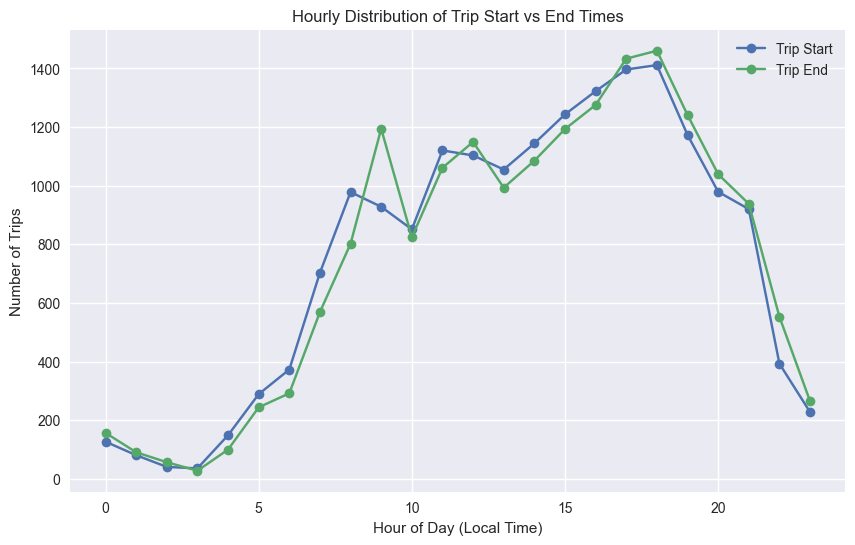

In [46]:
import pandas as pd

df = individual_trips_converted.copy()

# Parse datetimes
df['start_local'] = pd.to_datetime(df['start_local'], errors='coerce')
df['end_local'] = pd.to_datetime(df['end_local'], errors='coerce')

# Extract hours
df['start_hour'] = df['start_local'].dt.hour
df['end_hour'] = df['end_local'].dt.hour


import matplotlib.pyplot as plt

# Count start and end frequency
start_counts = df['start_hour'].value_counts().sort_index()
end_counts = df['end_hour'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10,6))
plt.plot(start_counts.index, start_counts.values, label='Trip Start', marker='o')
plt.plot(end_counts.index, end_counts.values, label='Trip End', marker='o')
plt.title('Hourly Distribution of Trip Start vs End Times')
plt.xlabel('Hour of Day (Local Time)')
plt.ylabel('Number of Trips')
plt.legend()
plt.grid(True)
plt.show()


/Users/jialianglin/.pyenv/versions/3.8.13/envs/jupyter_lab/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128663 (\N{AUTOMOBILE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


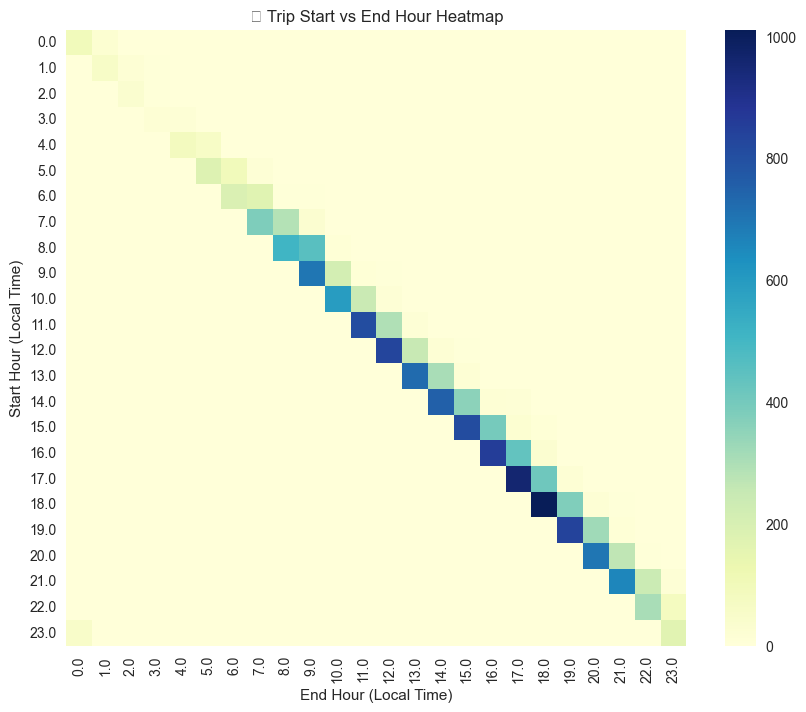

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = individual_trips_converted.copy()
df['start_local'] = pd.to_datetime(df['start_local'], errors='coerce')
df['end_local'] = pd.to_datetime(df['end_local'], errors='coerce')
df['start_hour'] = df['start_local'].dt.hour
df['end_hour'] = df['end_local'].dt.hour

# Group to get trip frequency by start/end hour
heatmap_data = (
    df.groupby(['start_hour', 'end_hour'])
    .size()
    .unstack(fill_value=0)
)

plt.figure(figsize=(10,8))
sns.heatmap(heatmap_data, cmap='YlGnBu')
plt.title('🚗 Trip Start vs End Hour Heatmap')
plt.xlabel('End Hour (Local Time)')
plt.ylabel('Start Hour (Local Time)')
plt.show()


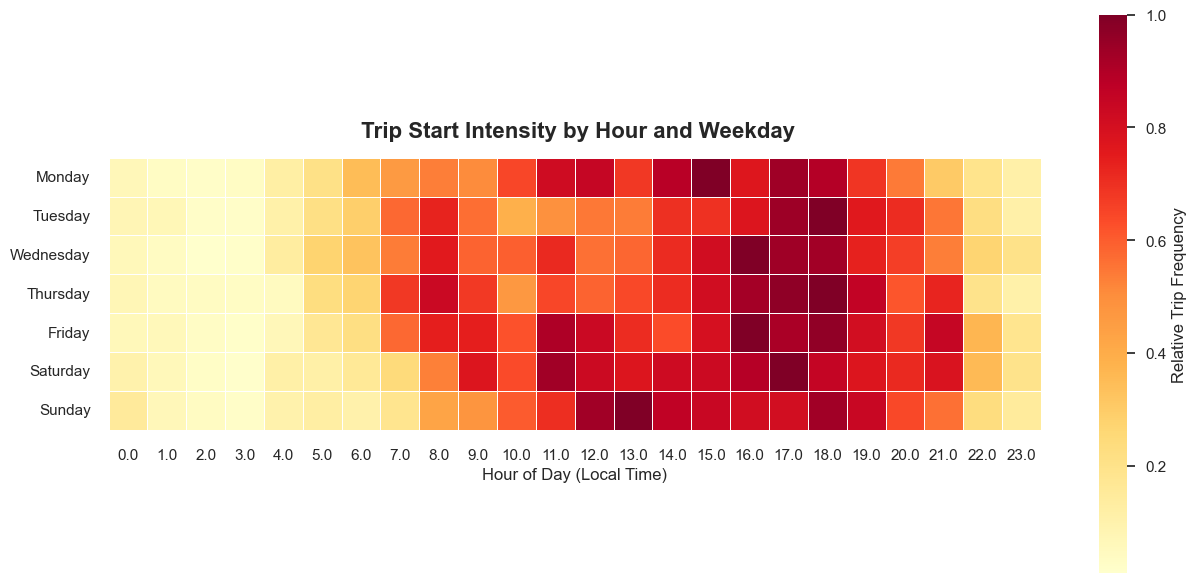

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# --- Step 1. Prepare data ---
df = individual_trips_converted.copy()
df['start_local'] = pd.to_datetime(df['start_local'], errors='coerce')
df['weekday'] = df['start_local'].dt.day_name()
df['start_hour'] = df['start_local'].dt.hour

# --- Step 2. Aggregate trip counts ---
heatmap_data = (
    df.groupby(['weekday', 'start_hour'])
    .size()
    .reset_index(name='trip_count')
)

# --- Step 3. Pivot and reorder weekdays ---
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_pivot = (
    heatmap_data.pivot(index='weekday', columns='start_hour', values='trip_count')
    .reindex(weekday_order)
)

# --- Step 4. Normalize (optional, makes low-activity days still visible) ---
heatmap_pivot_norm = heatmap_pivot.div(heatmap_pivot.max(axis=1), axis=0)

# --- Step 5. Plot heatmap ---
plt.figure(figsize=(13,6))
sns.set_theme(style="whitegrid")

ax = sns.heatmap(
    heatmap_pivot_norm,
    cmap="YlOrRd",          # 🔥 warm gradient (yellow→orange→red)
    linewidths=0.4,
    cbar_kws={'label': 'Relative Trip Frequency'},
    square=True
)

# --- Step 6. Styling ---
plt.title(' Trip Start Intensity by Hour and Weekday', fontsize=16, pad=15, weight='bold')
plt.xlabel('Hour of Day (Local Time)', fontsize=12)
plt.ylabel('')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


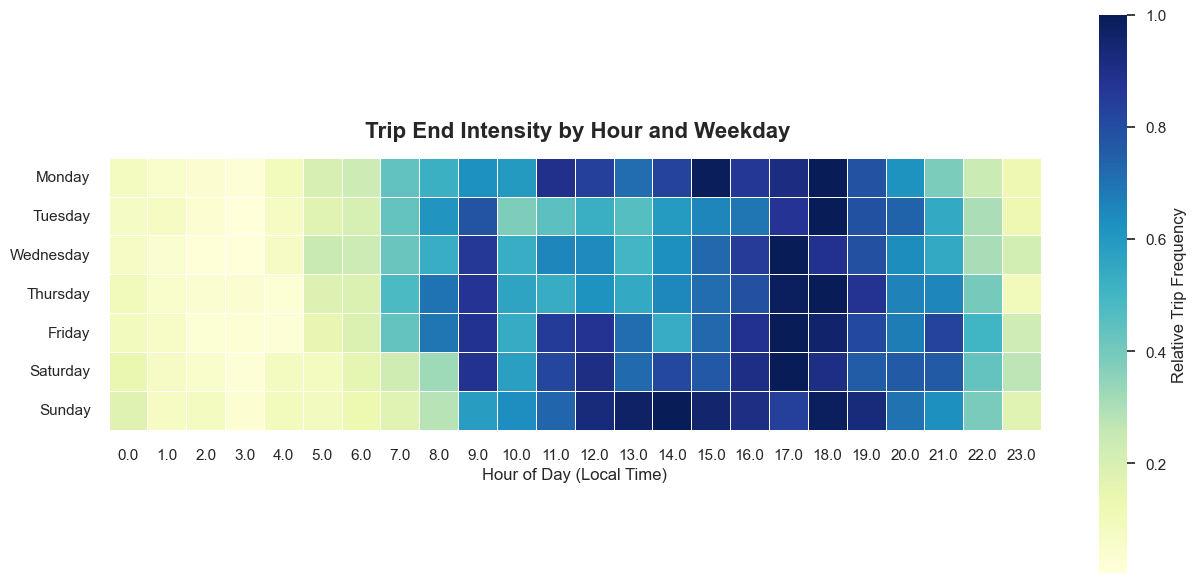

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = individual_trips_converted.copy()
df['end_local'] = pd.to_datetime(df['end_local'], errors='coerce')
df['weekday'] = df['end_local'].dt.day_name()
df['end_hour'] = df['end_local'].dt.hour

# --- Group by weekday + end hour ---
heatmap_data_end = (
    df.groupby(['weekday', 'end_hour'])
    .size()
    .reset_index(name='trip_count')
)

# --- Pivot + reorder weekdays ---
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_pivot_end = (
    heatmap_data_end.pivot(index='weekday', columns='end_hour', values='trip_count')
    .reindex(weekday_order)
)

# --- Normalize for visibility ---
heatmap_pivot_end_norm = heatmap_pivot_end.div(heatmap_pivot_end.max(axis=1), axis=0)

# --- Plot ---
plt.figure(figsize=(13,6))
sns.set_theme(style="whitegrid")
sns.heatmap(
    heatmap_pivot_end_norm,
    cmap="YlGnBu",          # 🔷 Cooler tone to distinguish from start map
    linewidths=0.4,
    cbar_kws={'label': 'Relative Trip Frequency'},
    square=True
)

plt.title(' Trip End Intensity by Hour and Weekday', fontsize=16, pad=15, weight='bold')
plt.xlabel('Hour of Day (Local Time)')
plt.ylabel('')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
